In [1]:
# python peripherals
import sys
from pathlib import Path
from typing import Callable
sys.path.append('../../.')

# torch
import torch

# matplotlib
import matplotlib
import matplotlib.pyplot
import matplotlib.axes

# deep-signature
from deep_signature.core.base import SeedableObject
from deep_signature.manifolds.planar_curves.implementation import PlanarCurvesManager, PlanarCurve
from deep_signature.manifolds.planar_curves.groups import EuclideanGroup, SimilarityGroup, EquiaffineGroup, AffineGroup
from deep_signature.core import discrete_distributions
from deep_signature.training import datasets
from deep_signature.training.networks import DeepSignaturesNet
from deep_signature.training.activations import Sine
from deep_signature.manifolds.planar_curves.evaluation import PlanarCurvesApproximatedSignatureComparator, PlanarCurvesShapeMatchingEvaluator

C:\Users\Roy\miniconda3\envs\deep-signature\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
planar_curves_manager = PlanarCurvesManager(curves_file_path=Path("C:/deep-signature-data-new/curves/train/2022-12-31-15-12-51/curves.npy"))
print(f'{planar_curves_manager.planar_curves_count} curves loaded')

190843 curves loaded


In [3]:
supporting_points_count = 9
sample_points = 2 * supporting_points_count + 1

In [4]:
create_activation_fn: Callable[[int], torch.nn.Module] = lambda out_features_size: Sine()
create_batch_norm_fn: Callable[[int], torch.nn.Module] = lambda out_features_size: torch.nn.BatchNorm1d(num_features=out_features_size)
model_file_path = "C:/deep-signature-data-new/training/2023-01-02-17-11-16/models/model_150.pt"
device = torch.device('cpu')
model = DeepSignaturesNet(sample_points=sample_points, in_features_size=64, out_features_size=2, hidden_layer_repetitions=2, create_activation_fn=create_activation_fn, create_batch_norm_fn=create_batch_norm_fn, dropout_p=None)
model = torch.nn.DataParallel(model)
model.load_state_dict(torch.load(model_file_path))
model.eval()

DataParallel(
  (module): DeepSignaturesNet(
    (_regressor): Sequential(
      (0): Linear(in_features=38, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Sine()
      (3): Linear(in_features=64, out_features=64, bias=True)
      (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Sine()
      (6): Linear(in_features=64, out_features=32, bias=True)
      (7): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): Sine()
      (9): Linear(in_features=32, out_features=32, bias=True)
      (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (11): Sine()
      (12): Linear(in_features=32, out_features=16, bias=True)
      (13): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (14): Sine()
      (15): Linear(in_features=16, out_features=16, bias=True)
  

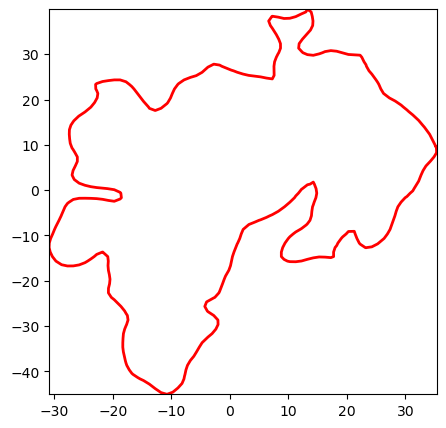

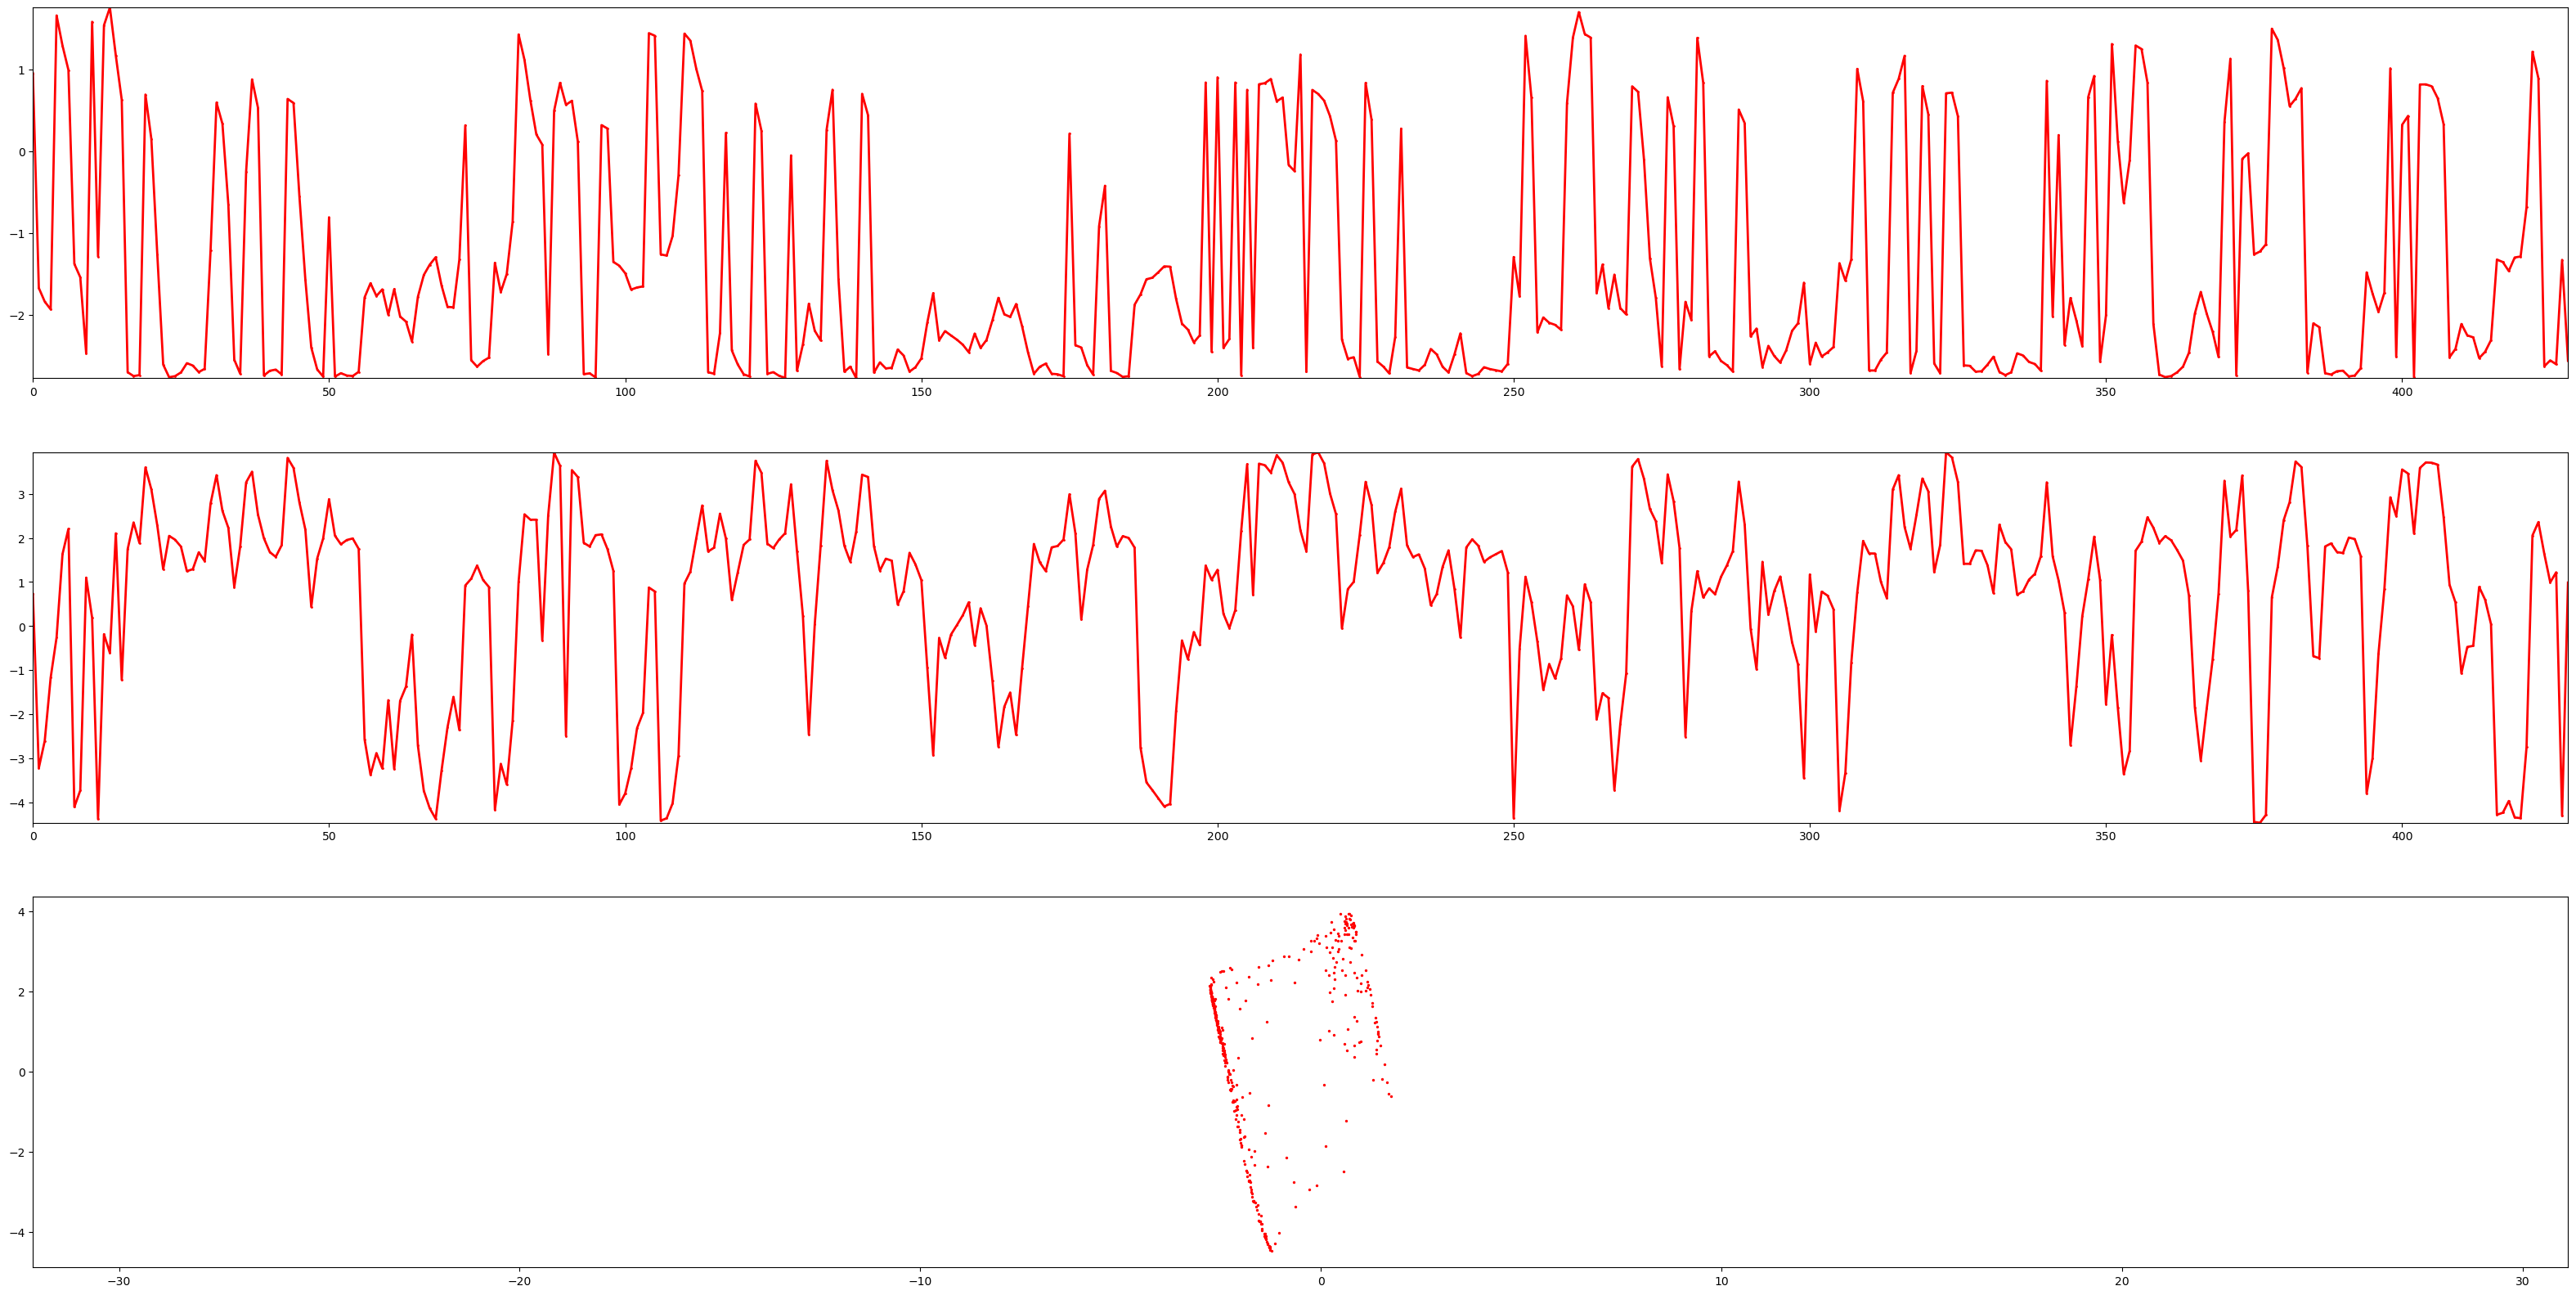

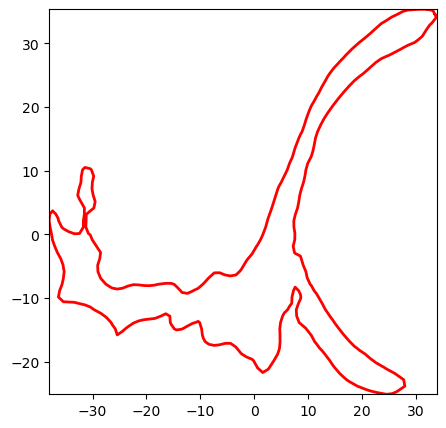

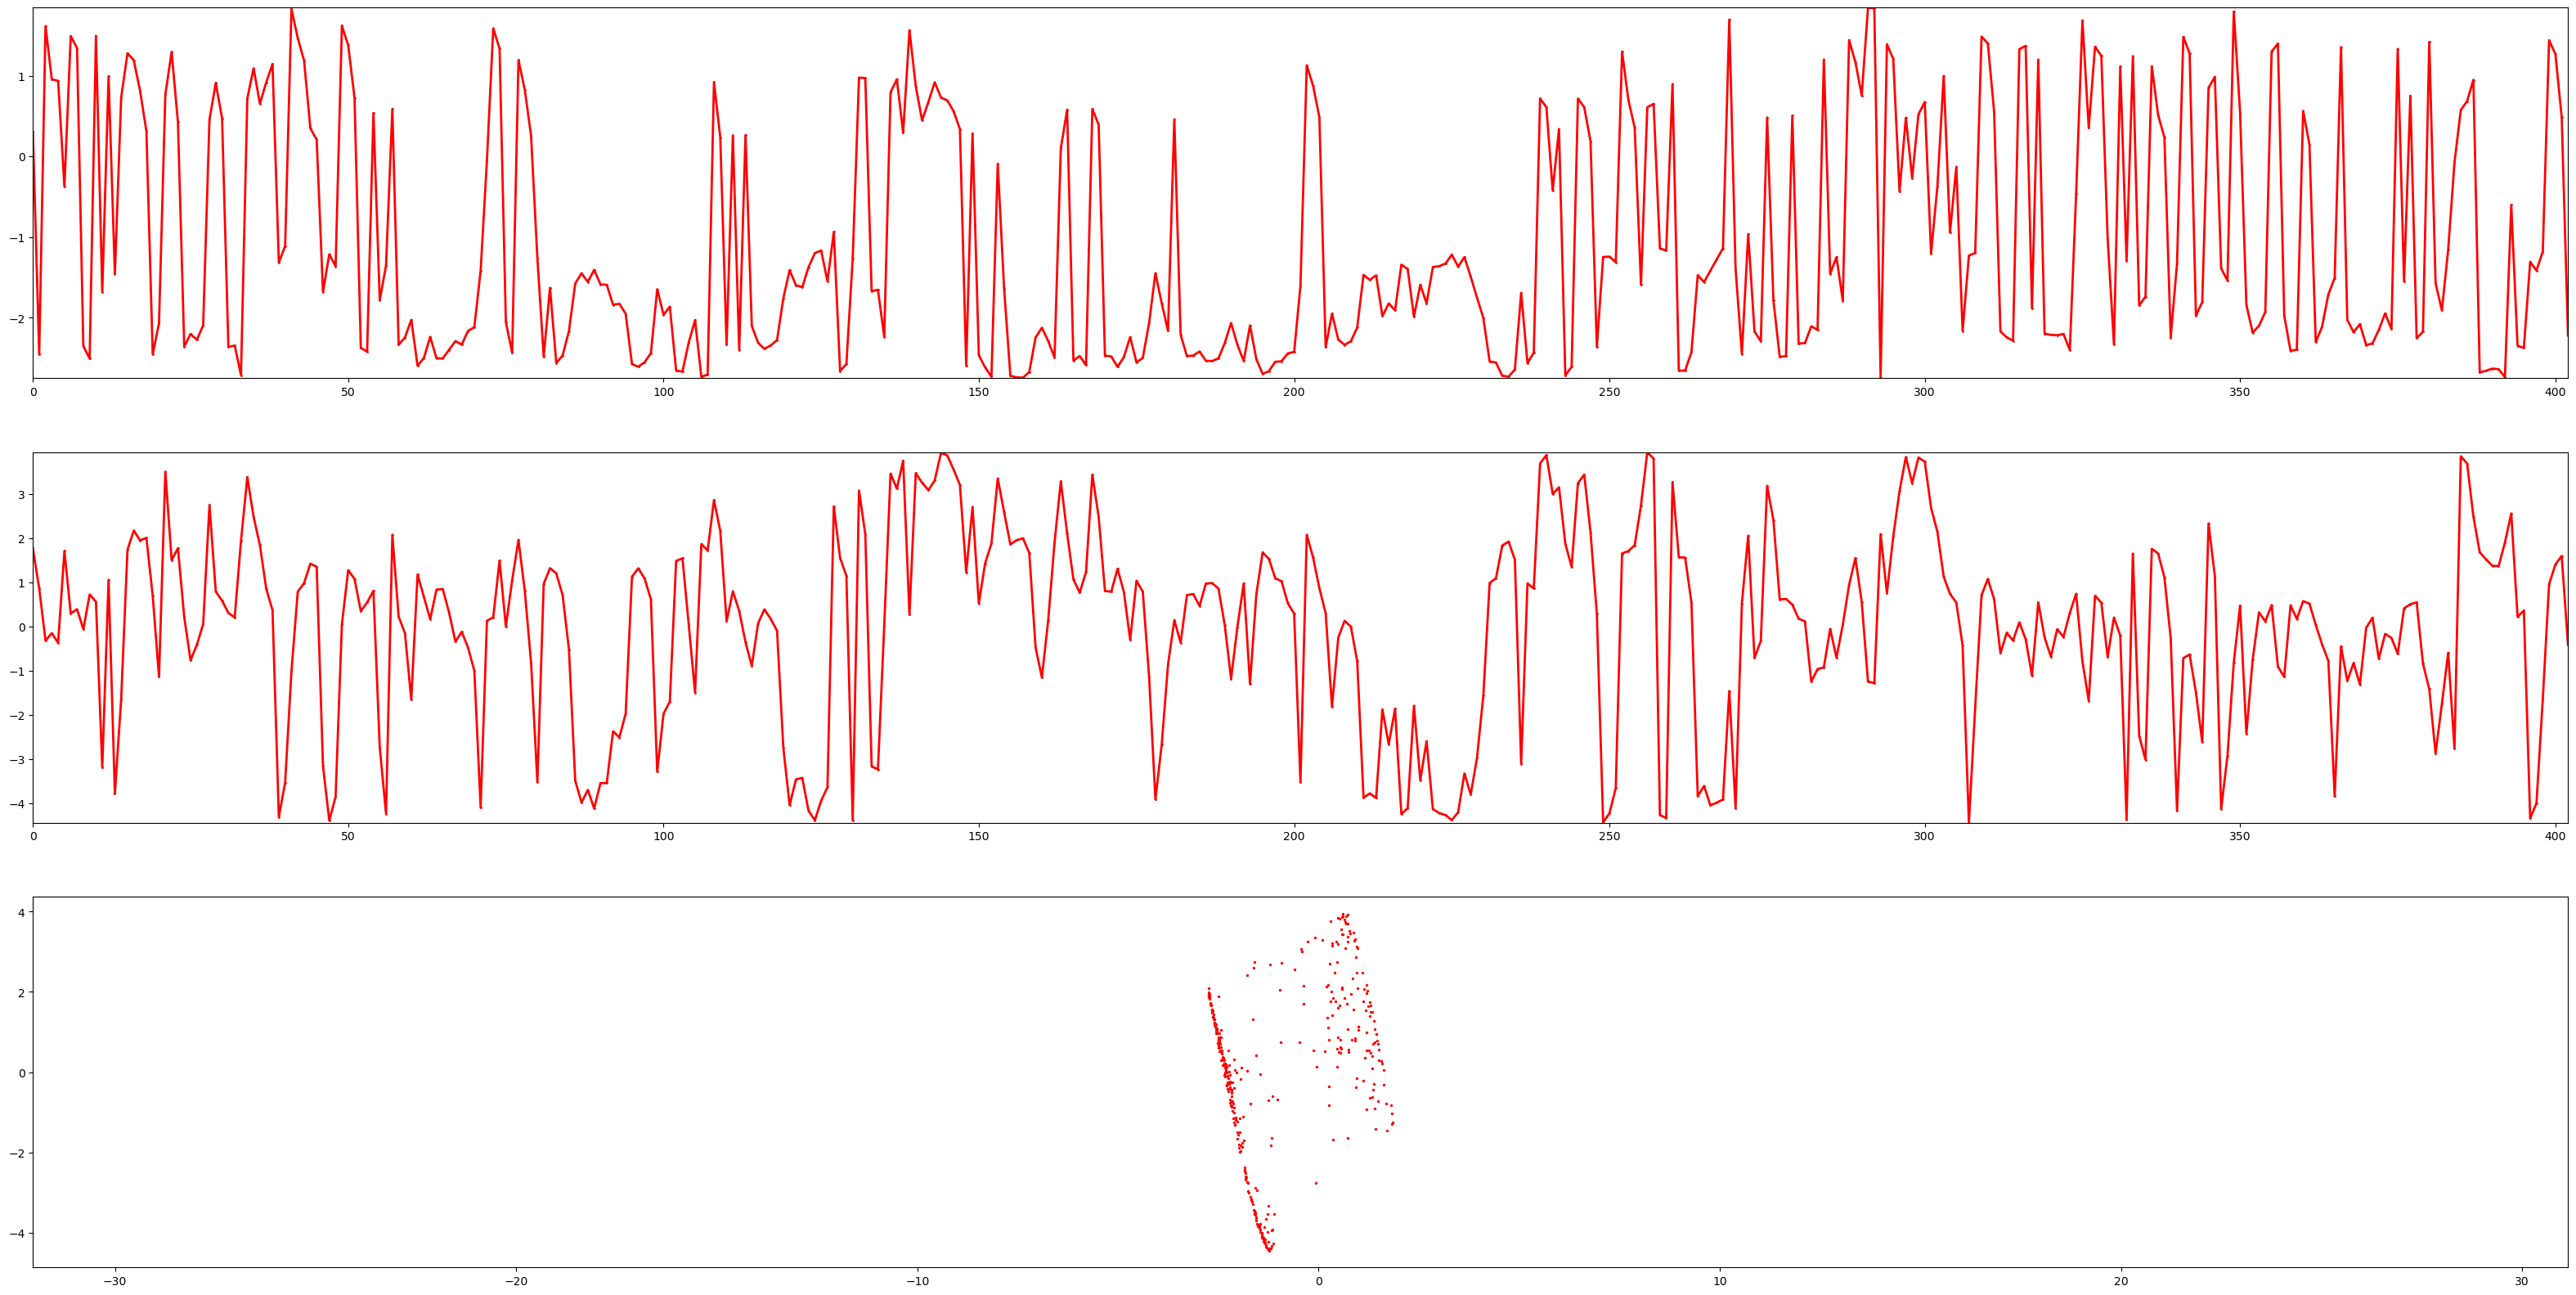

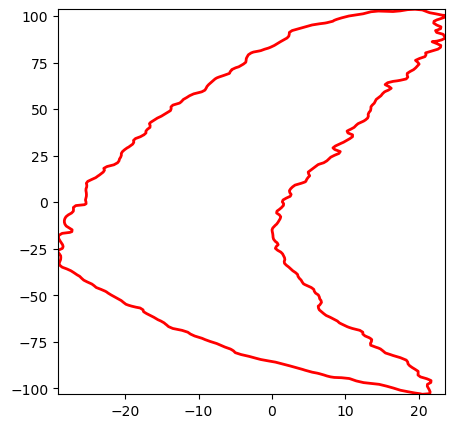

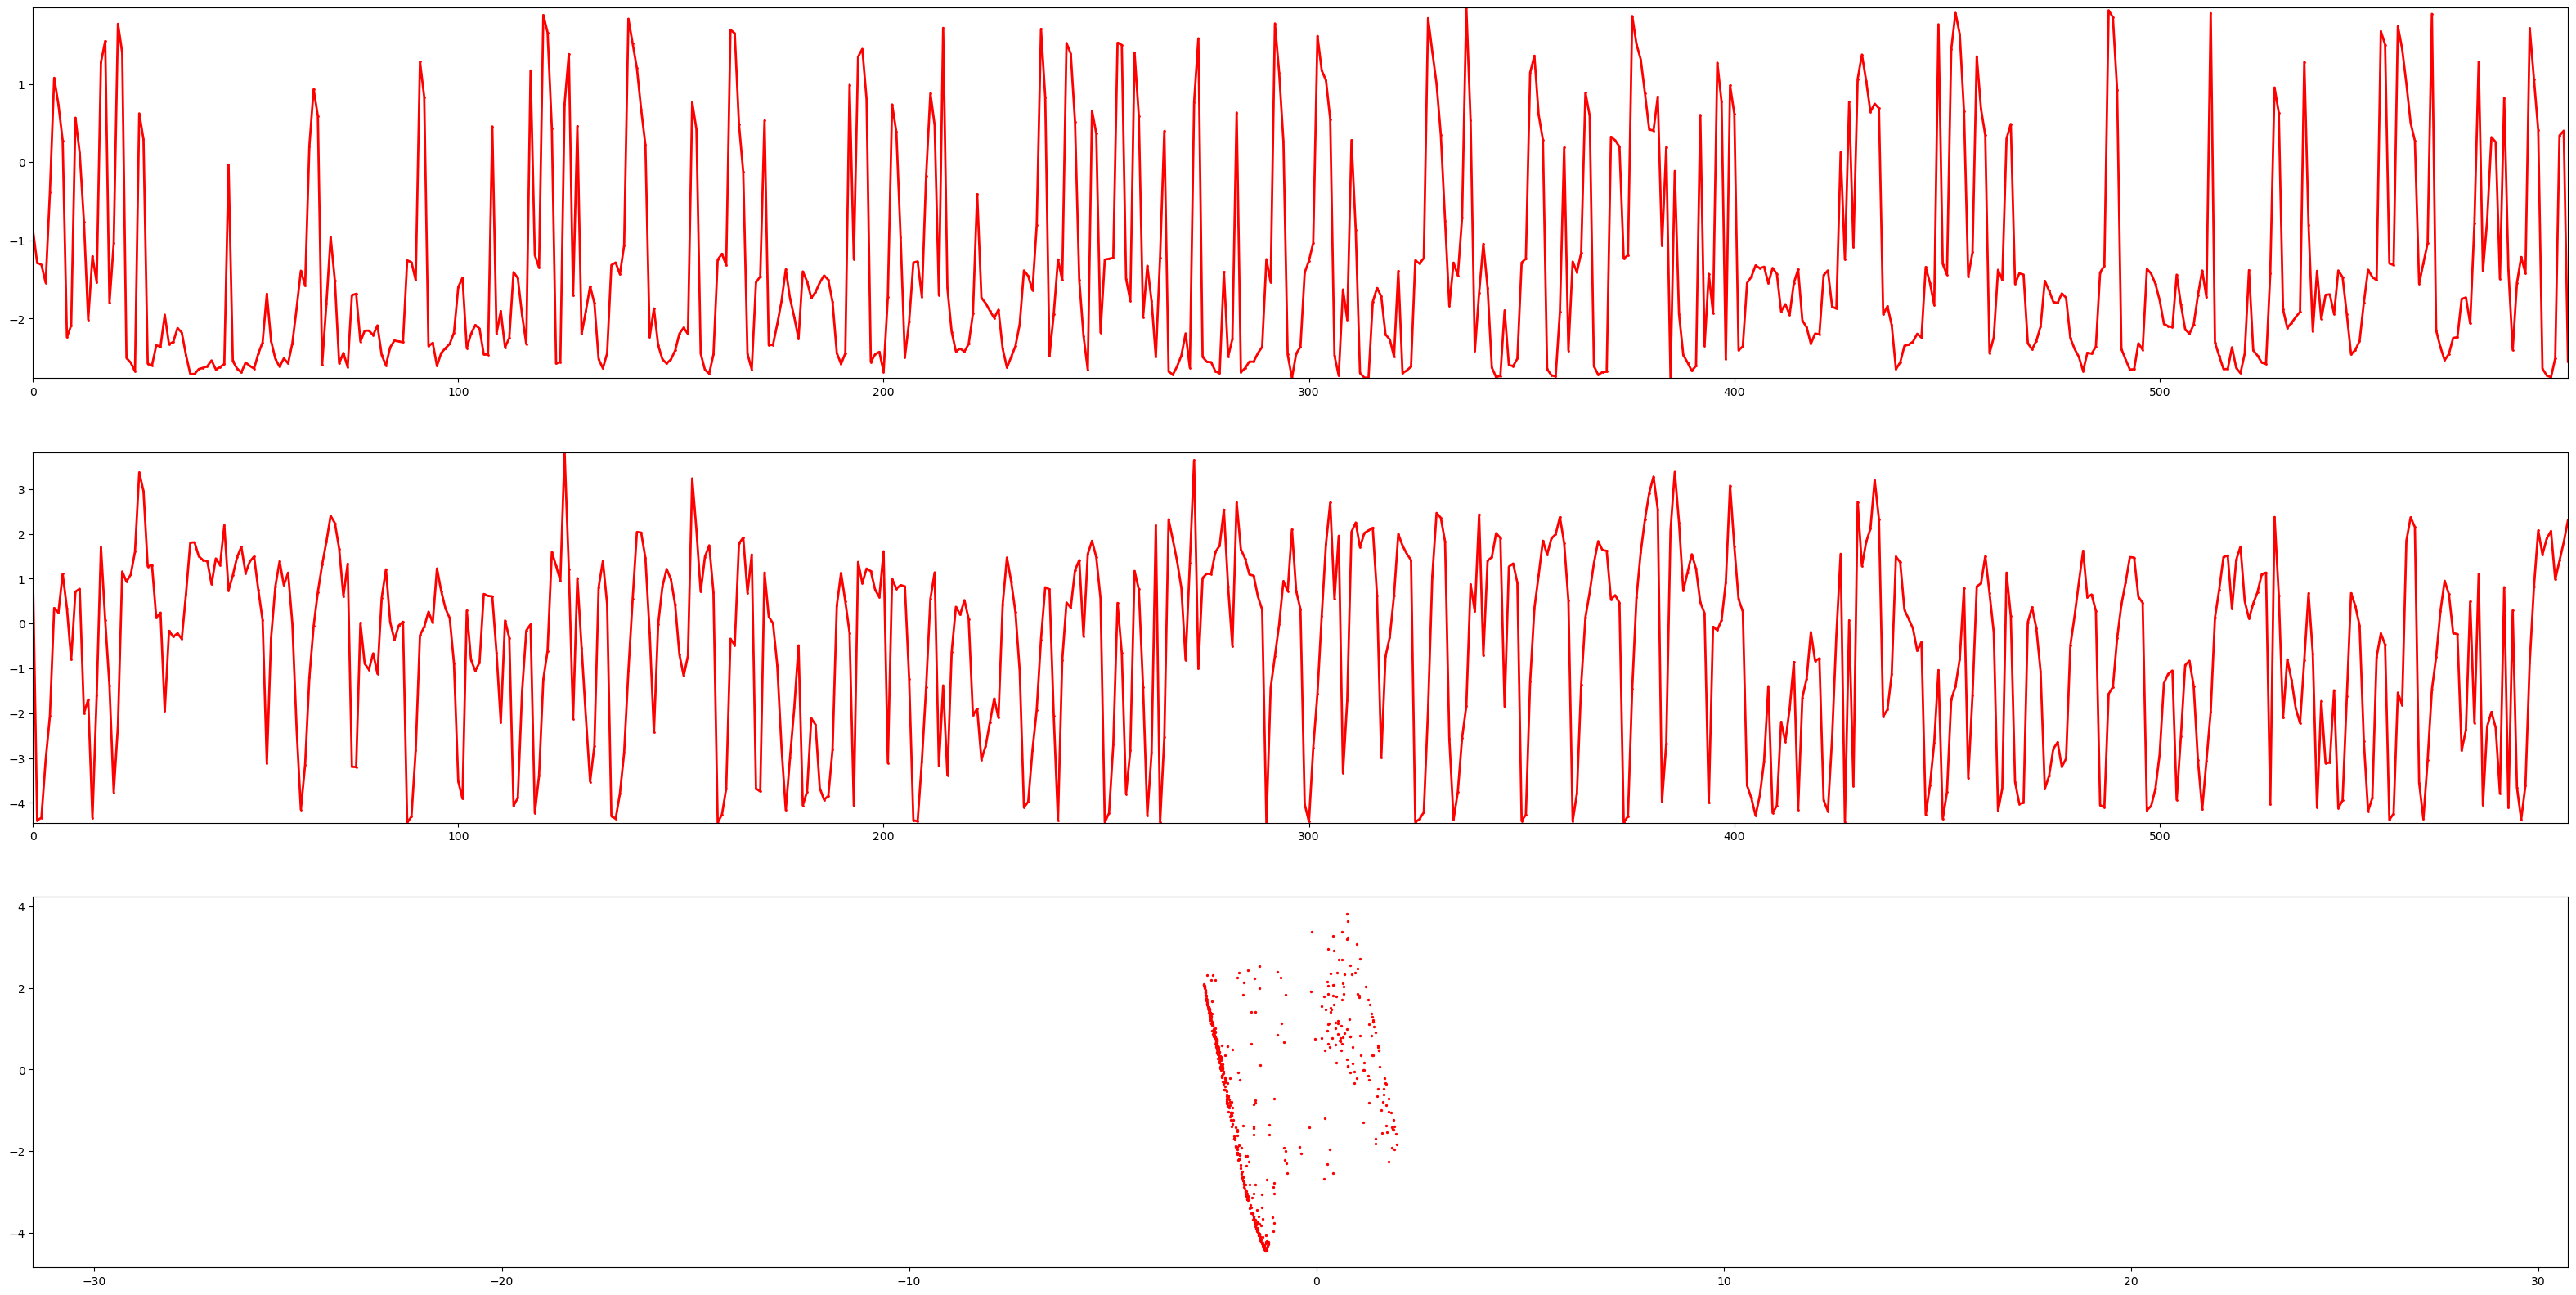

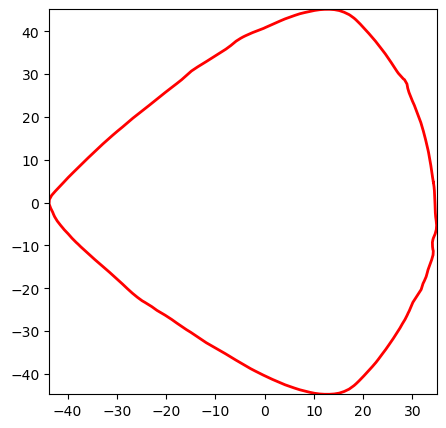

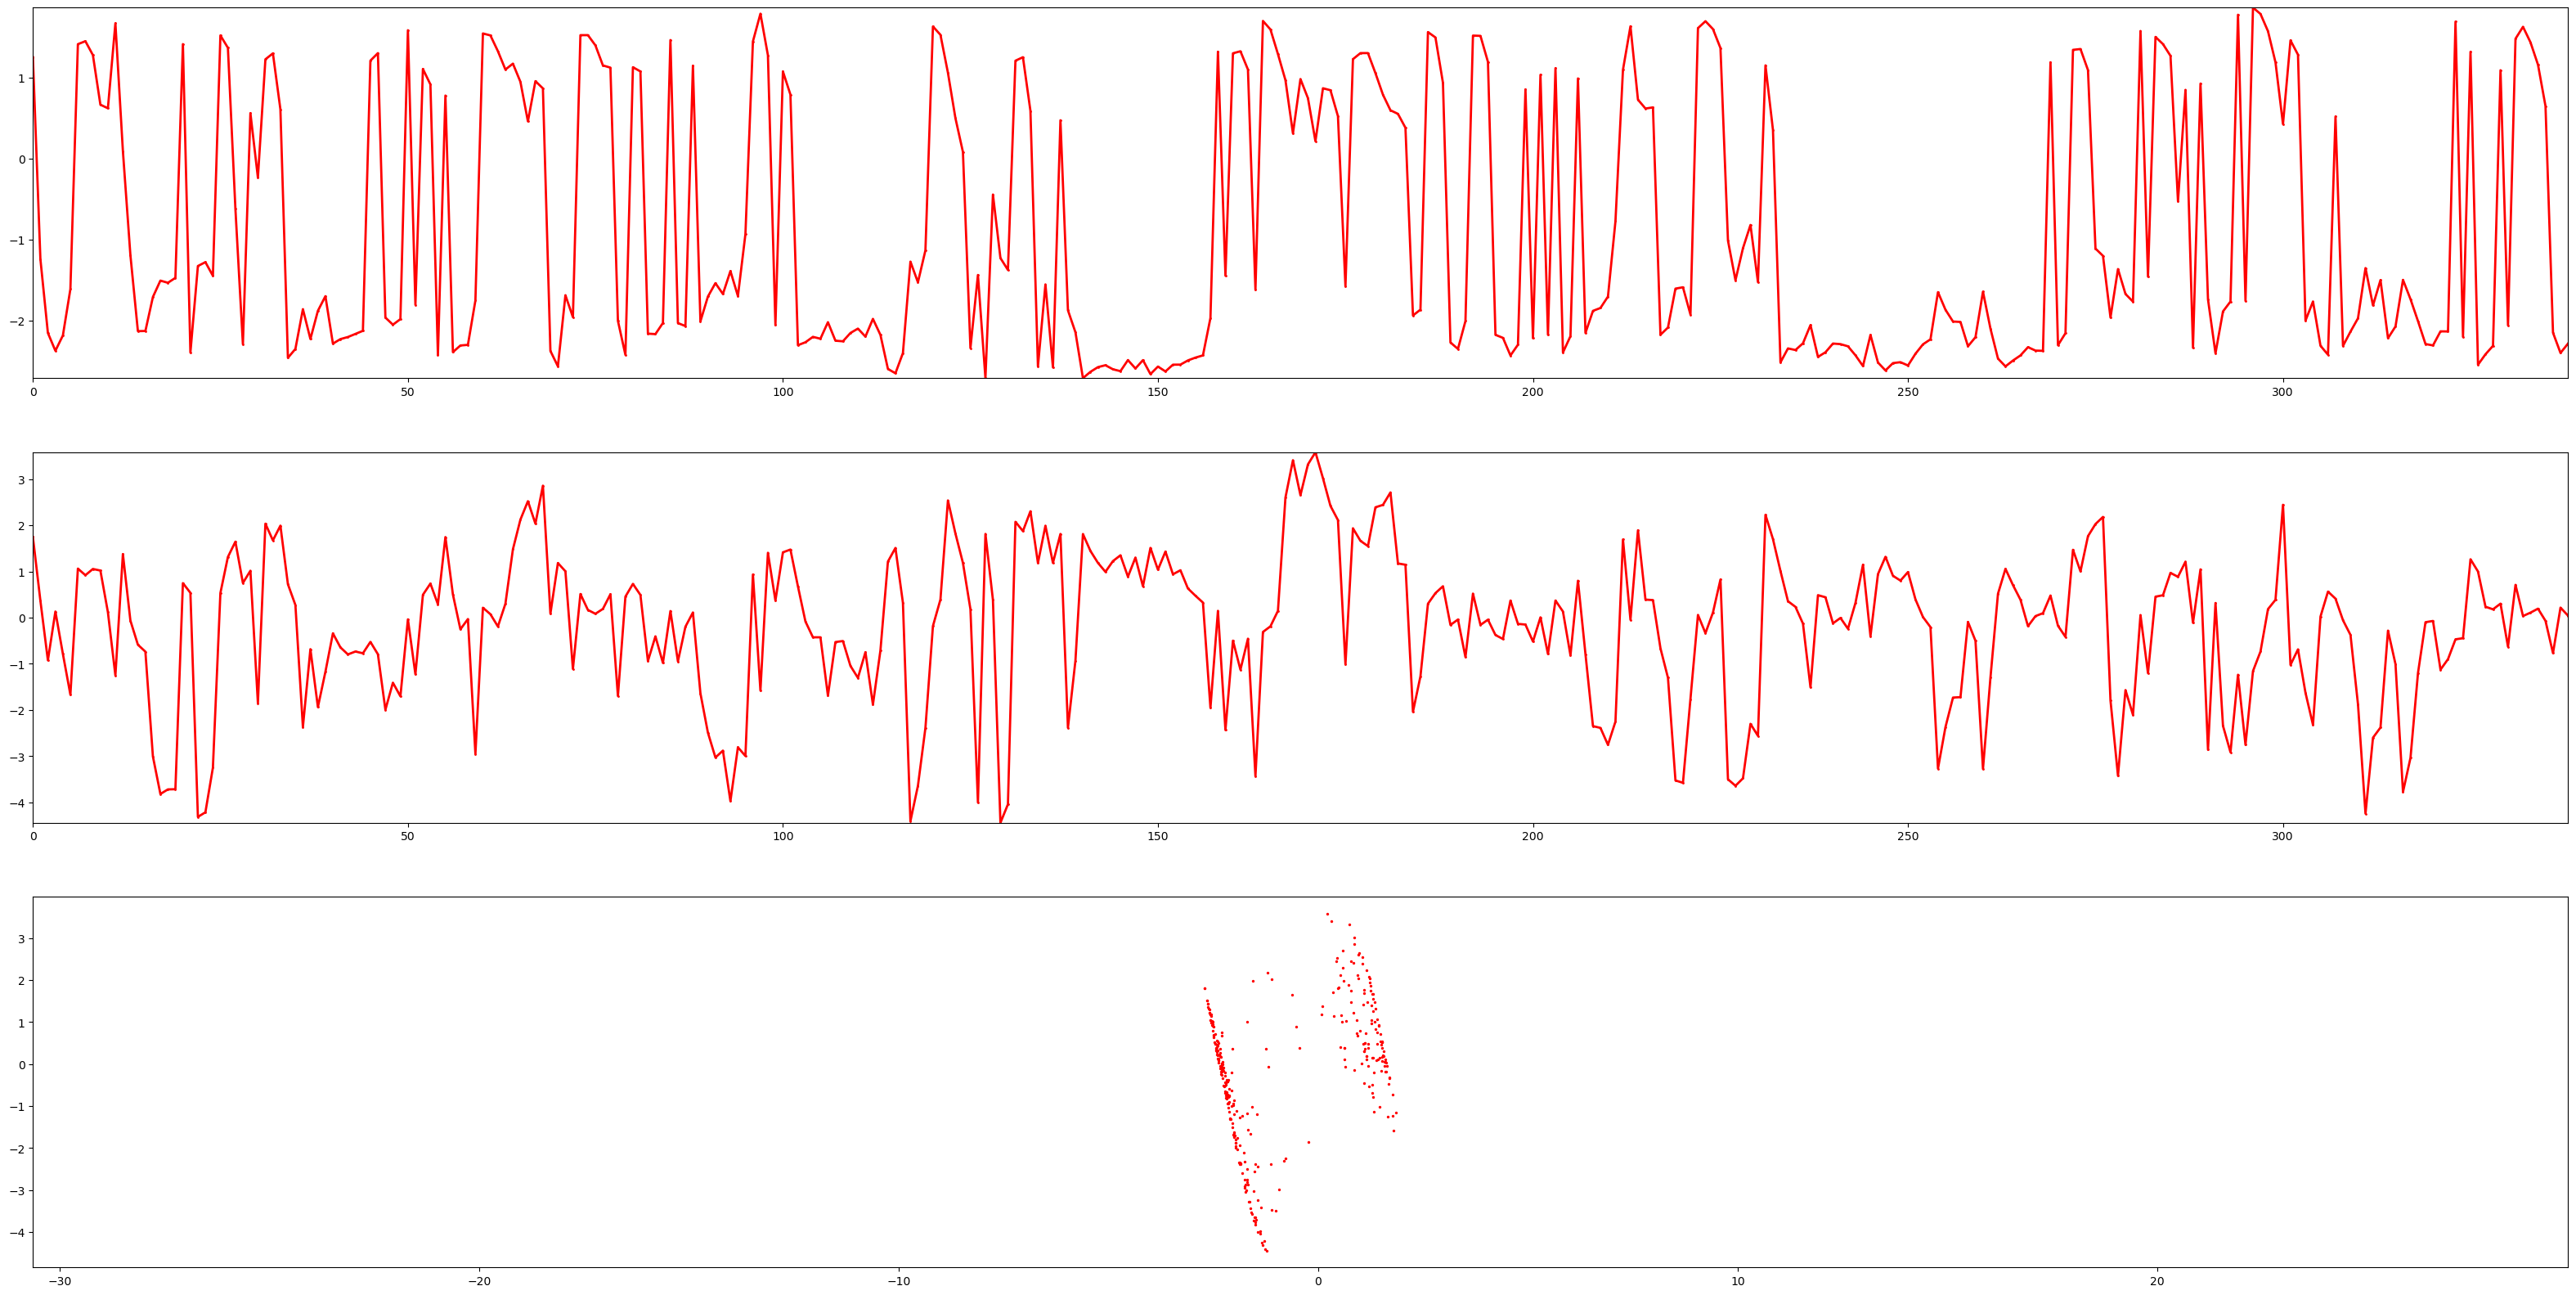

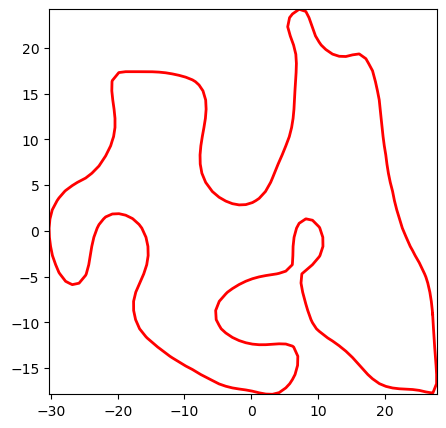

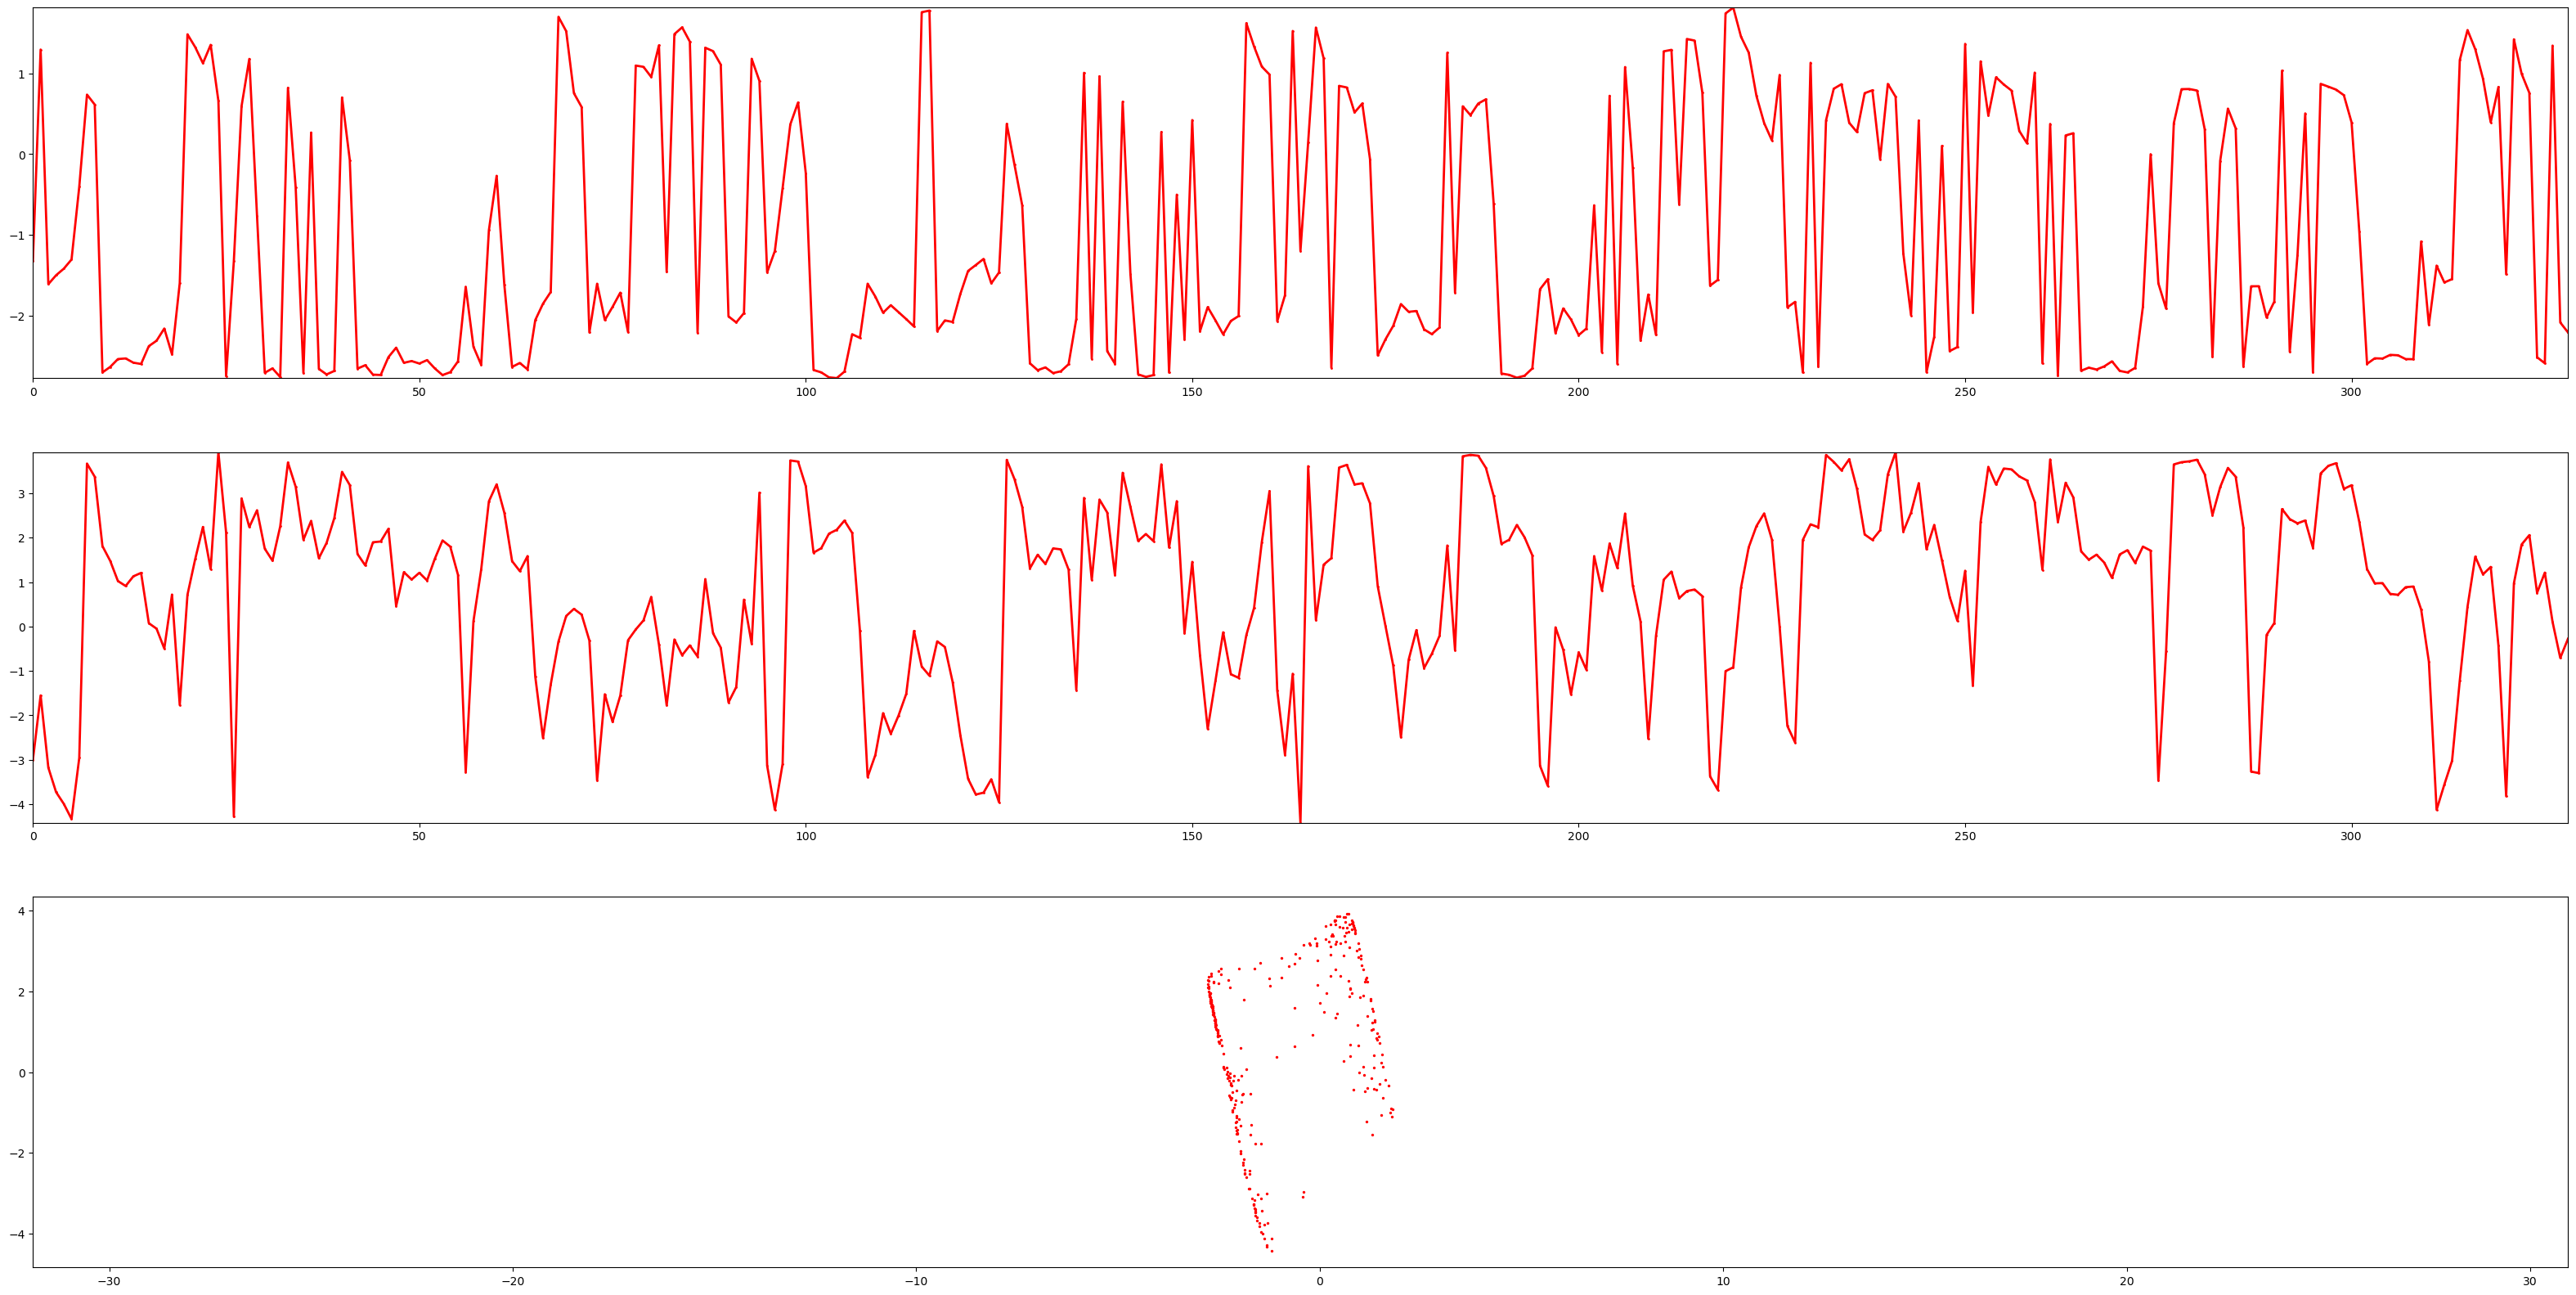

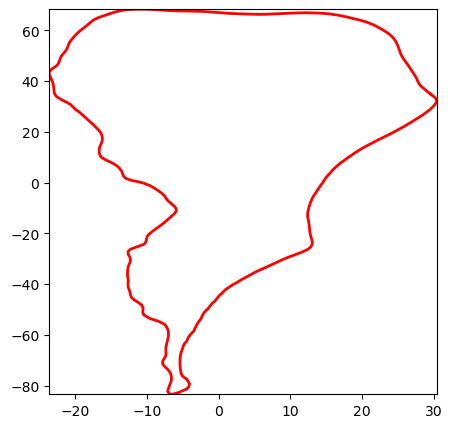

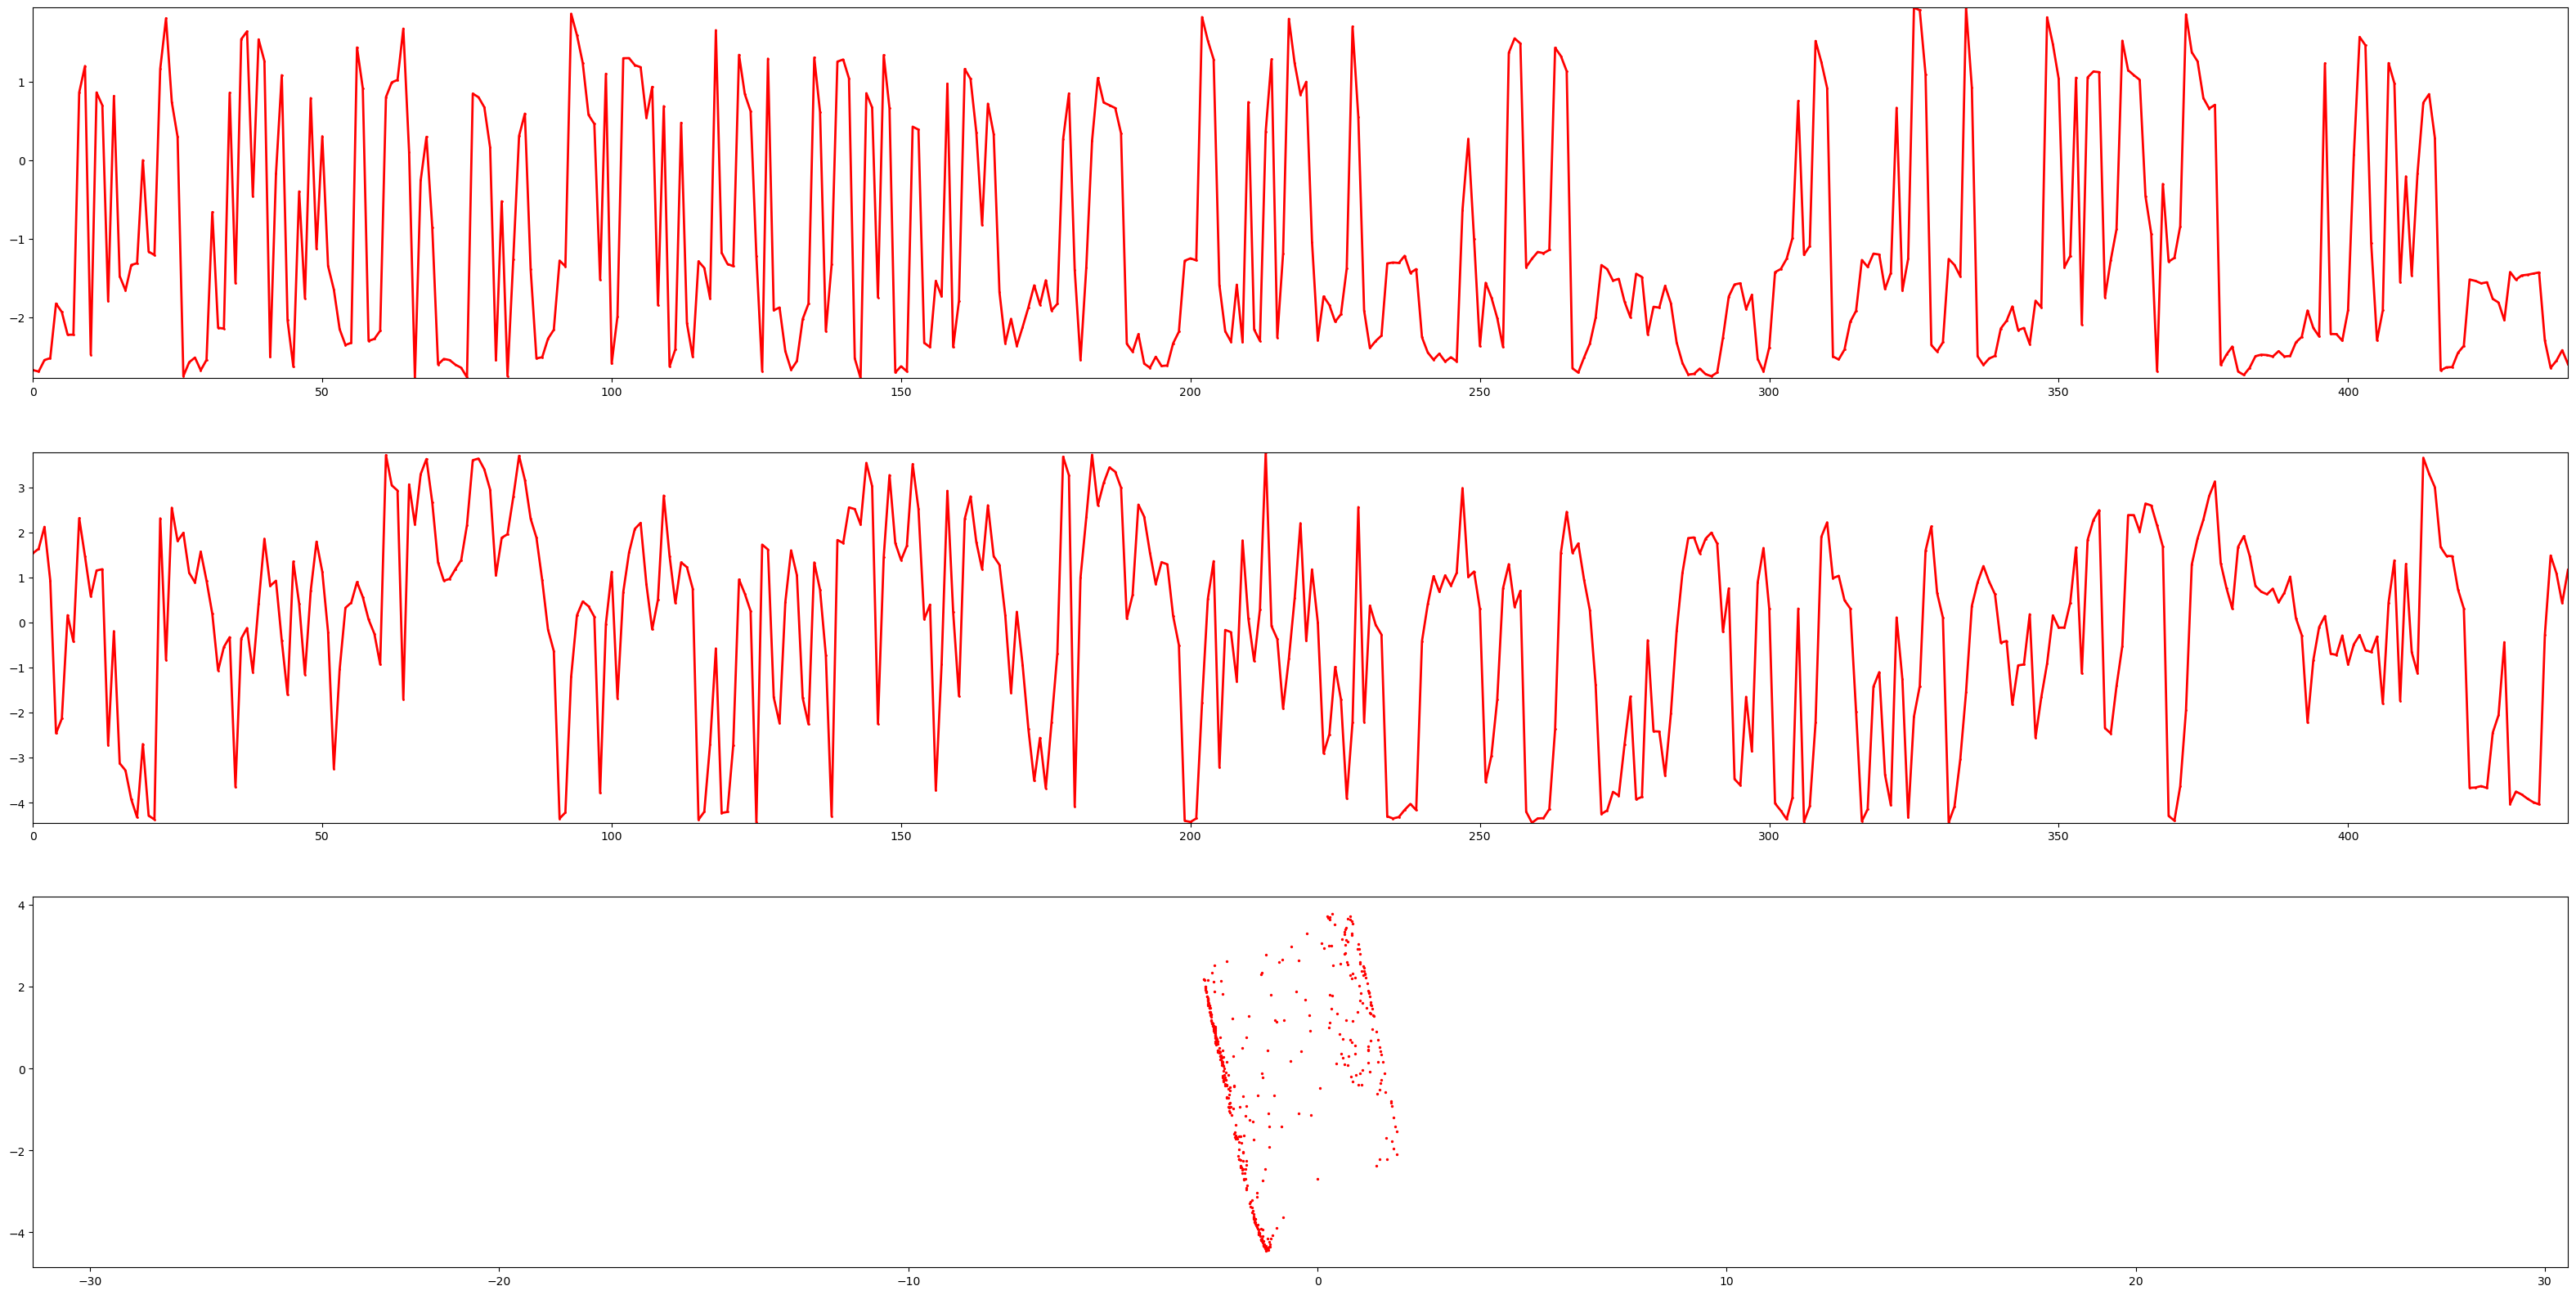

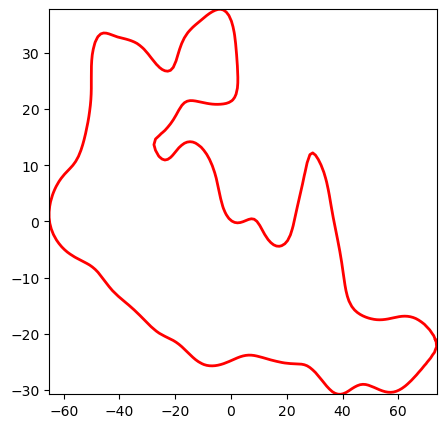

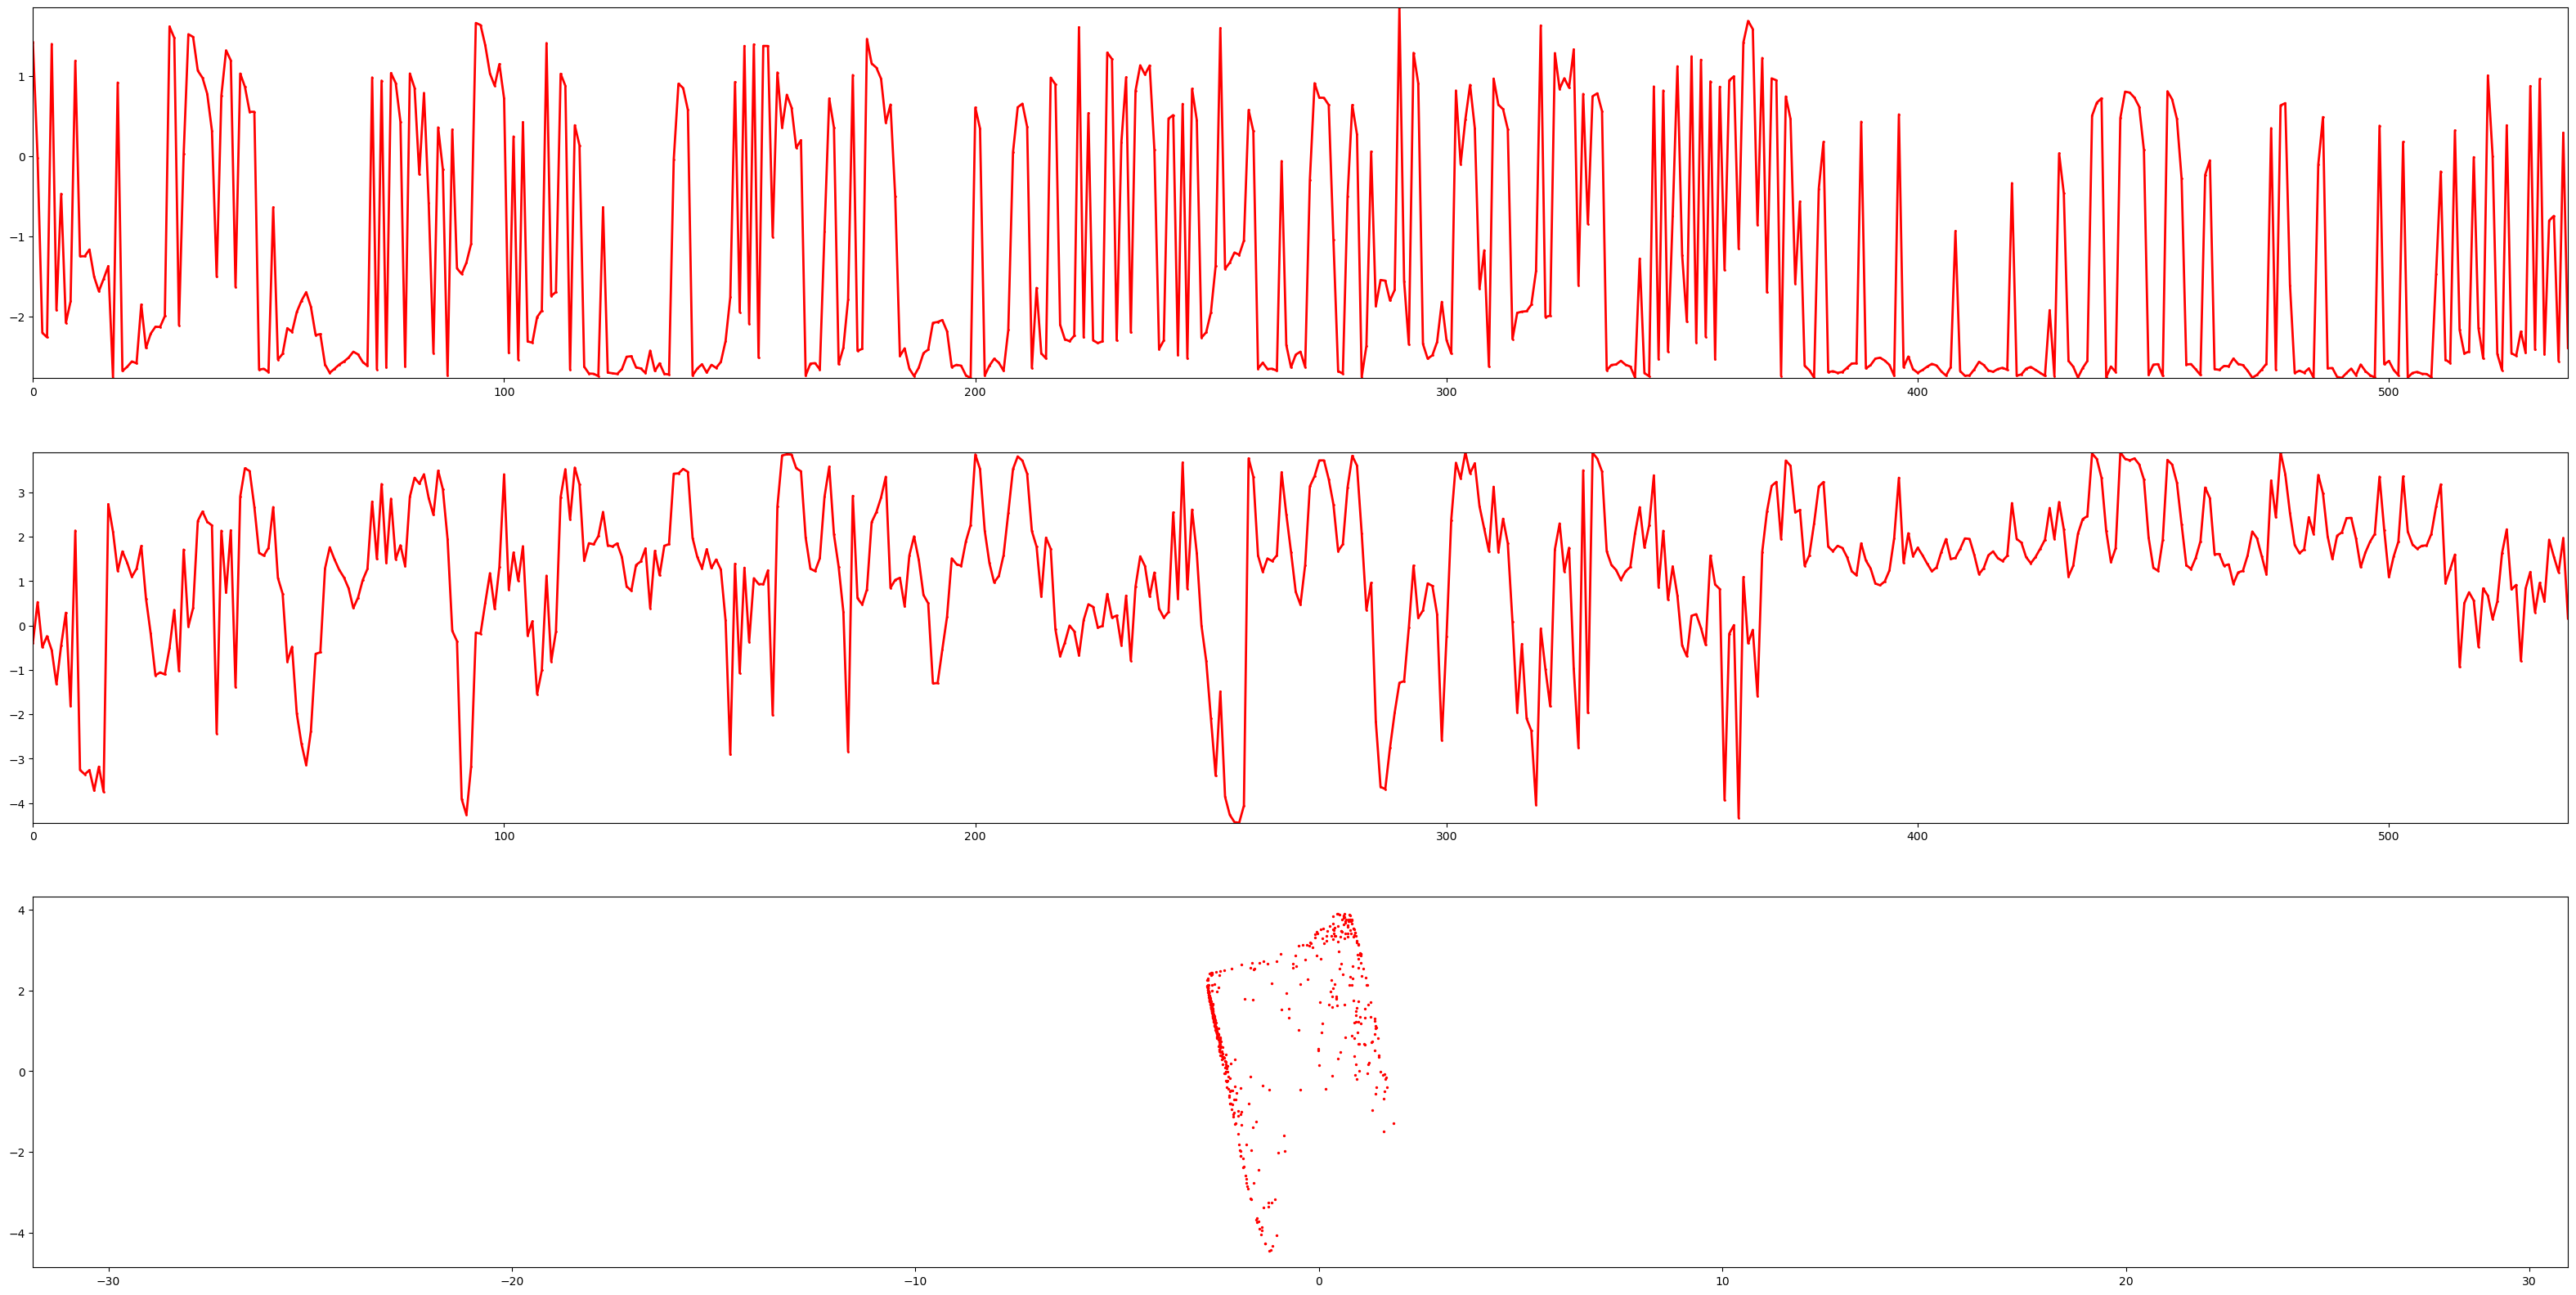

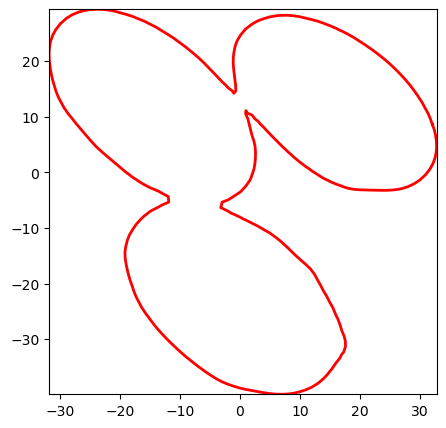

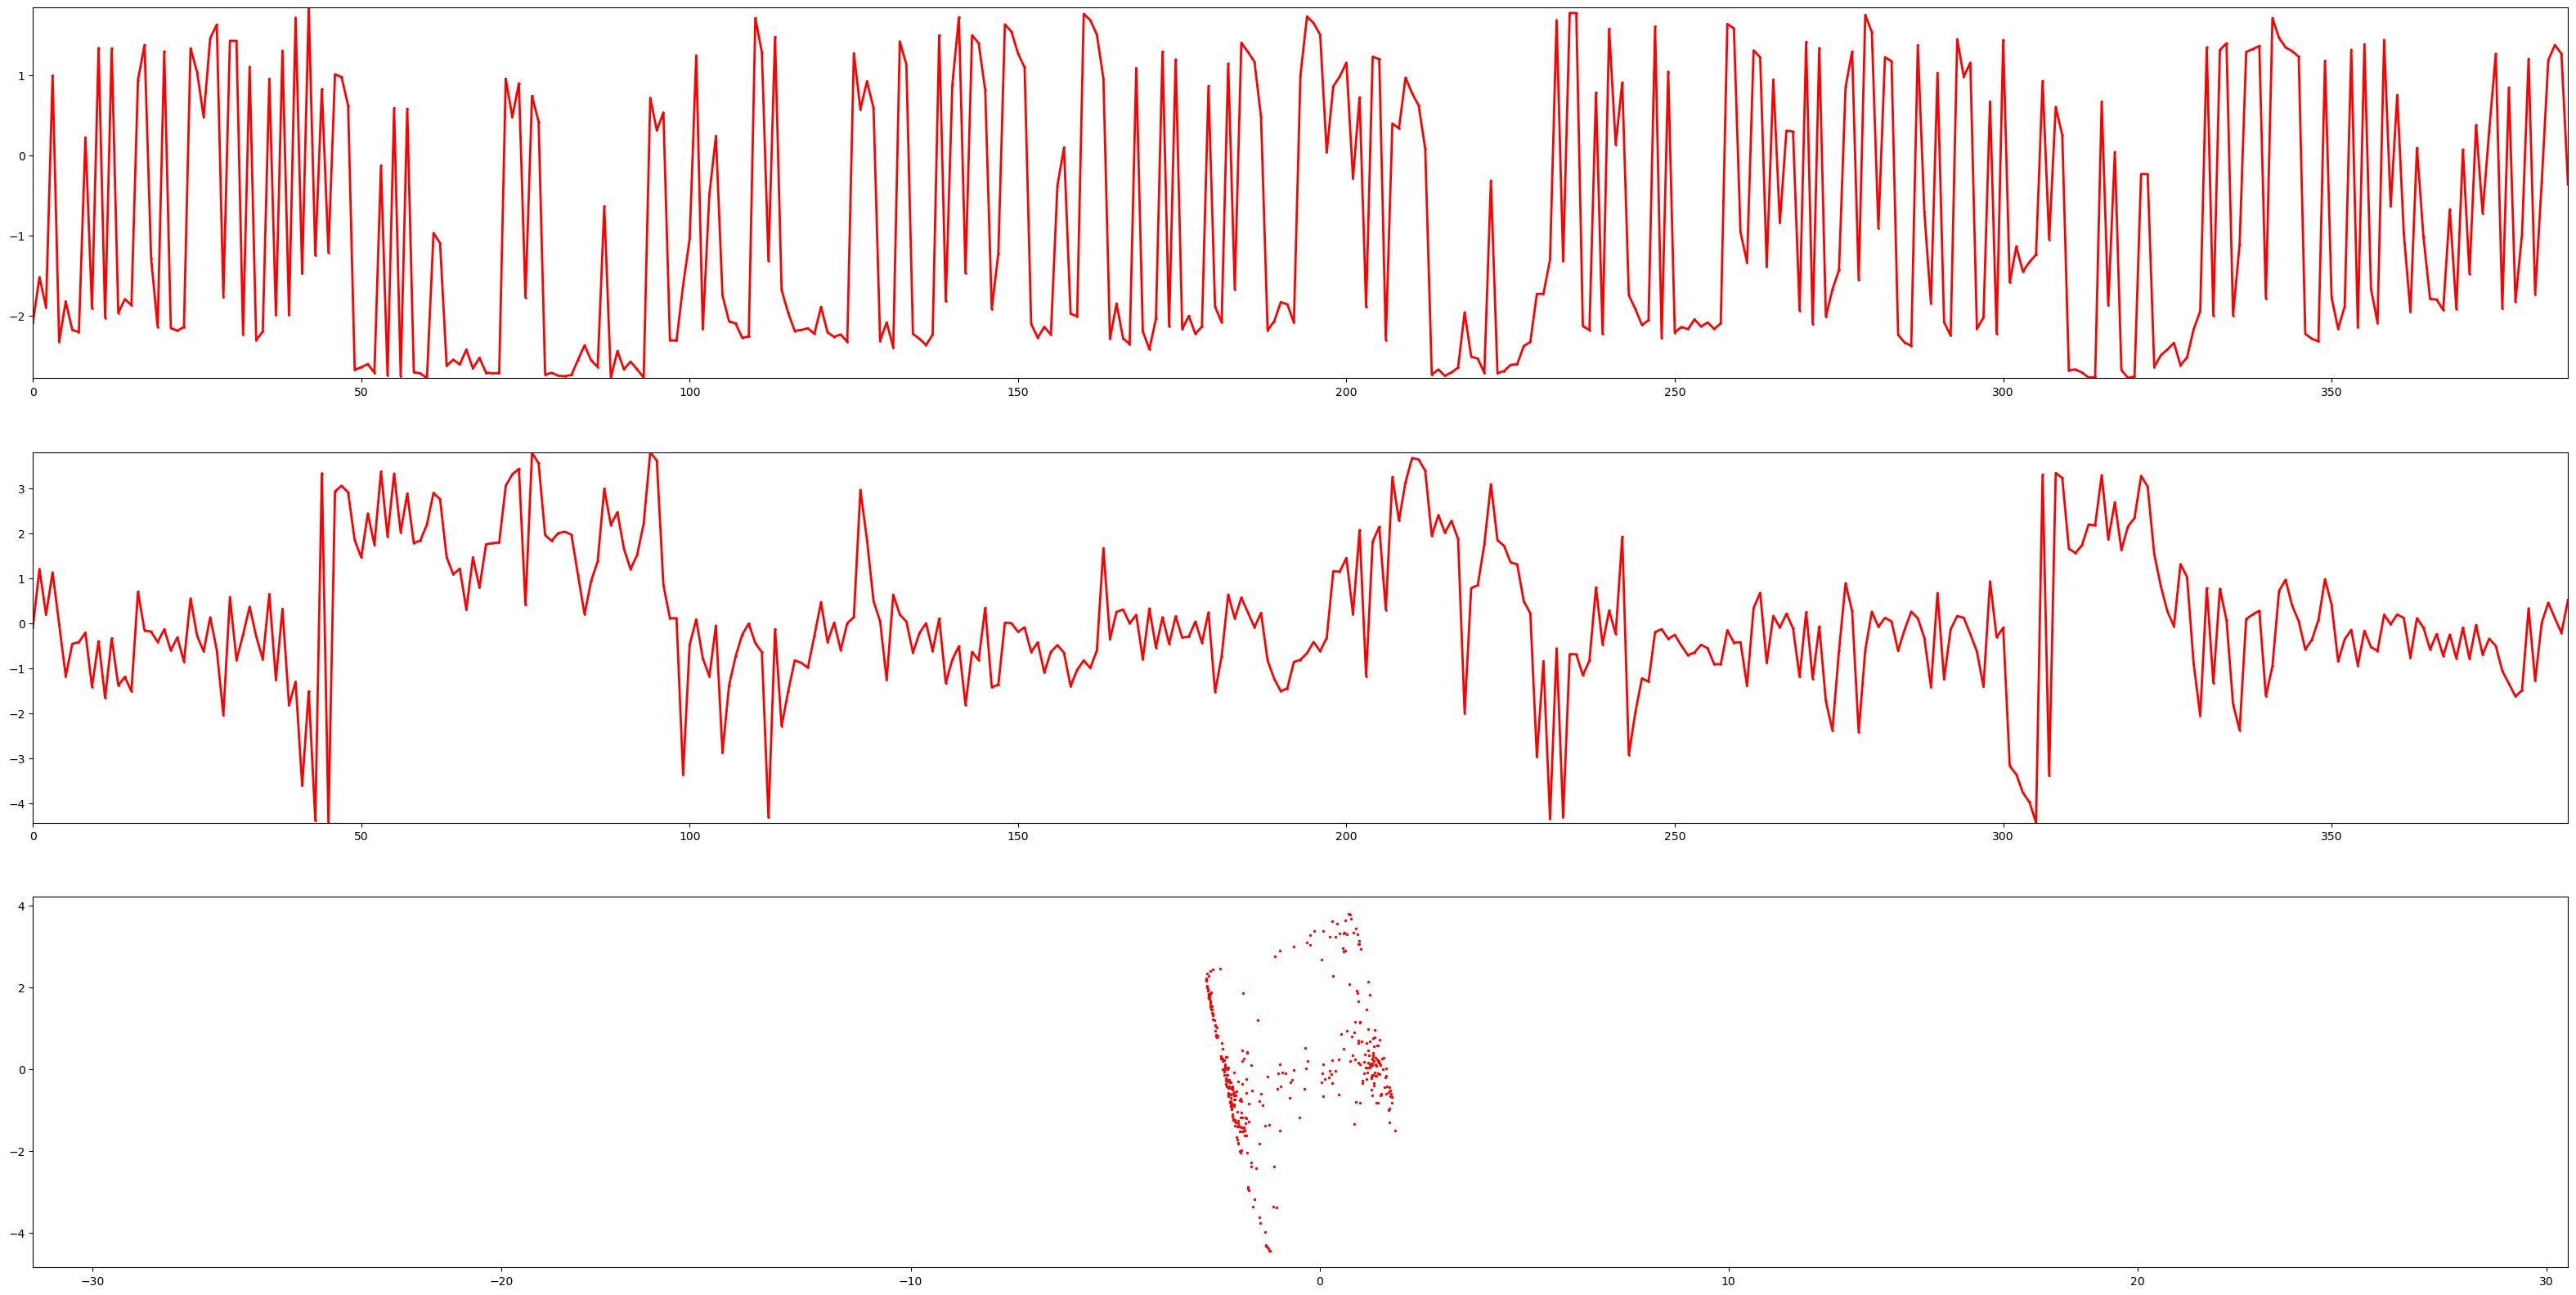

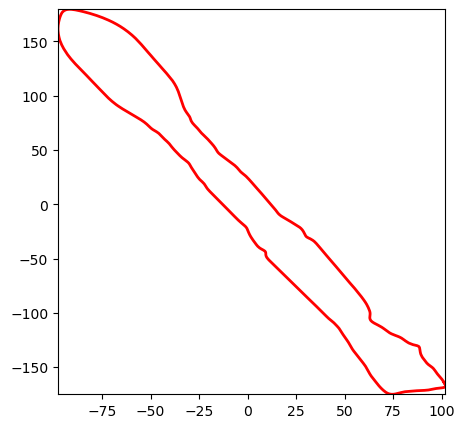

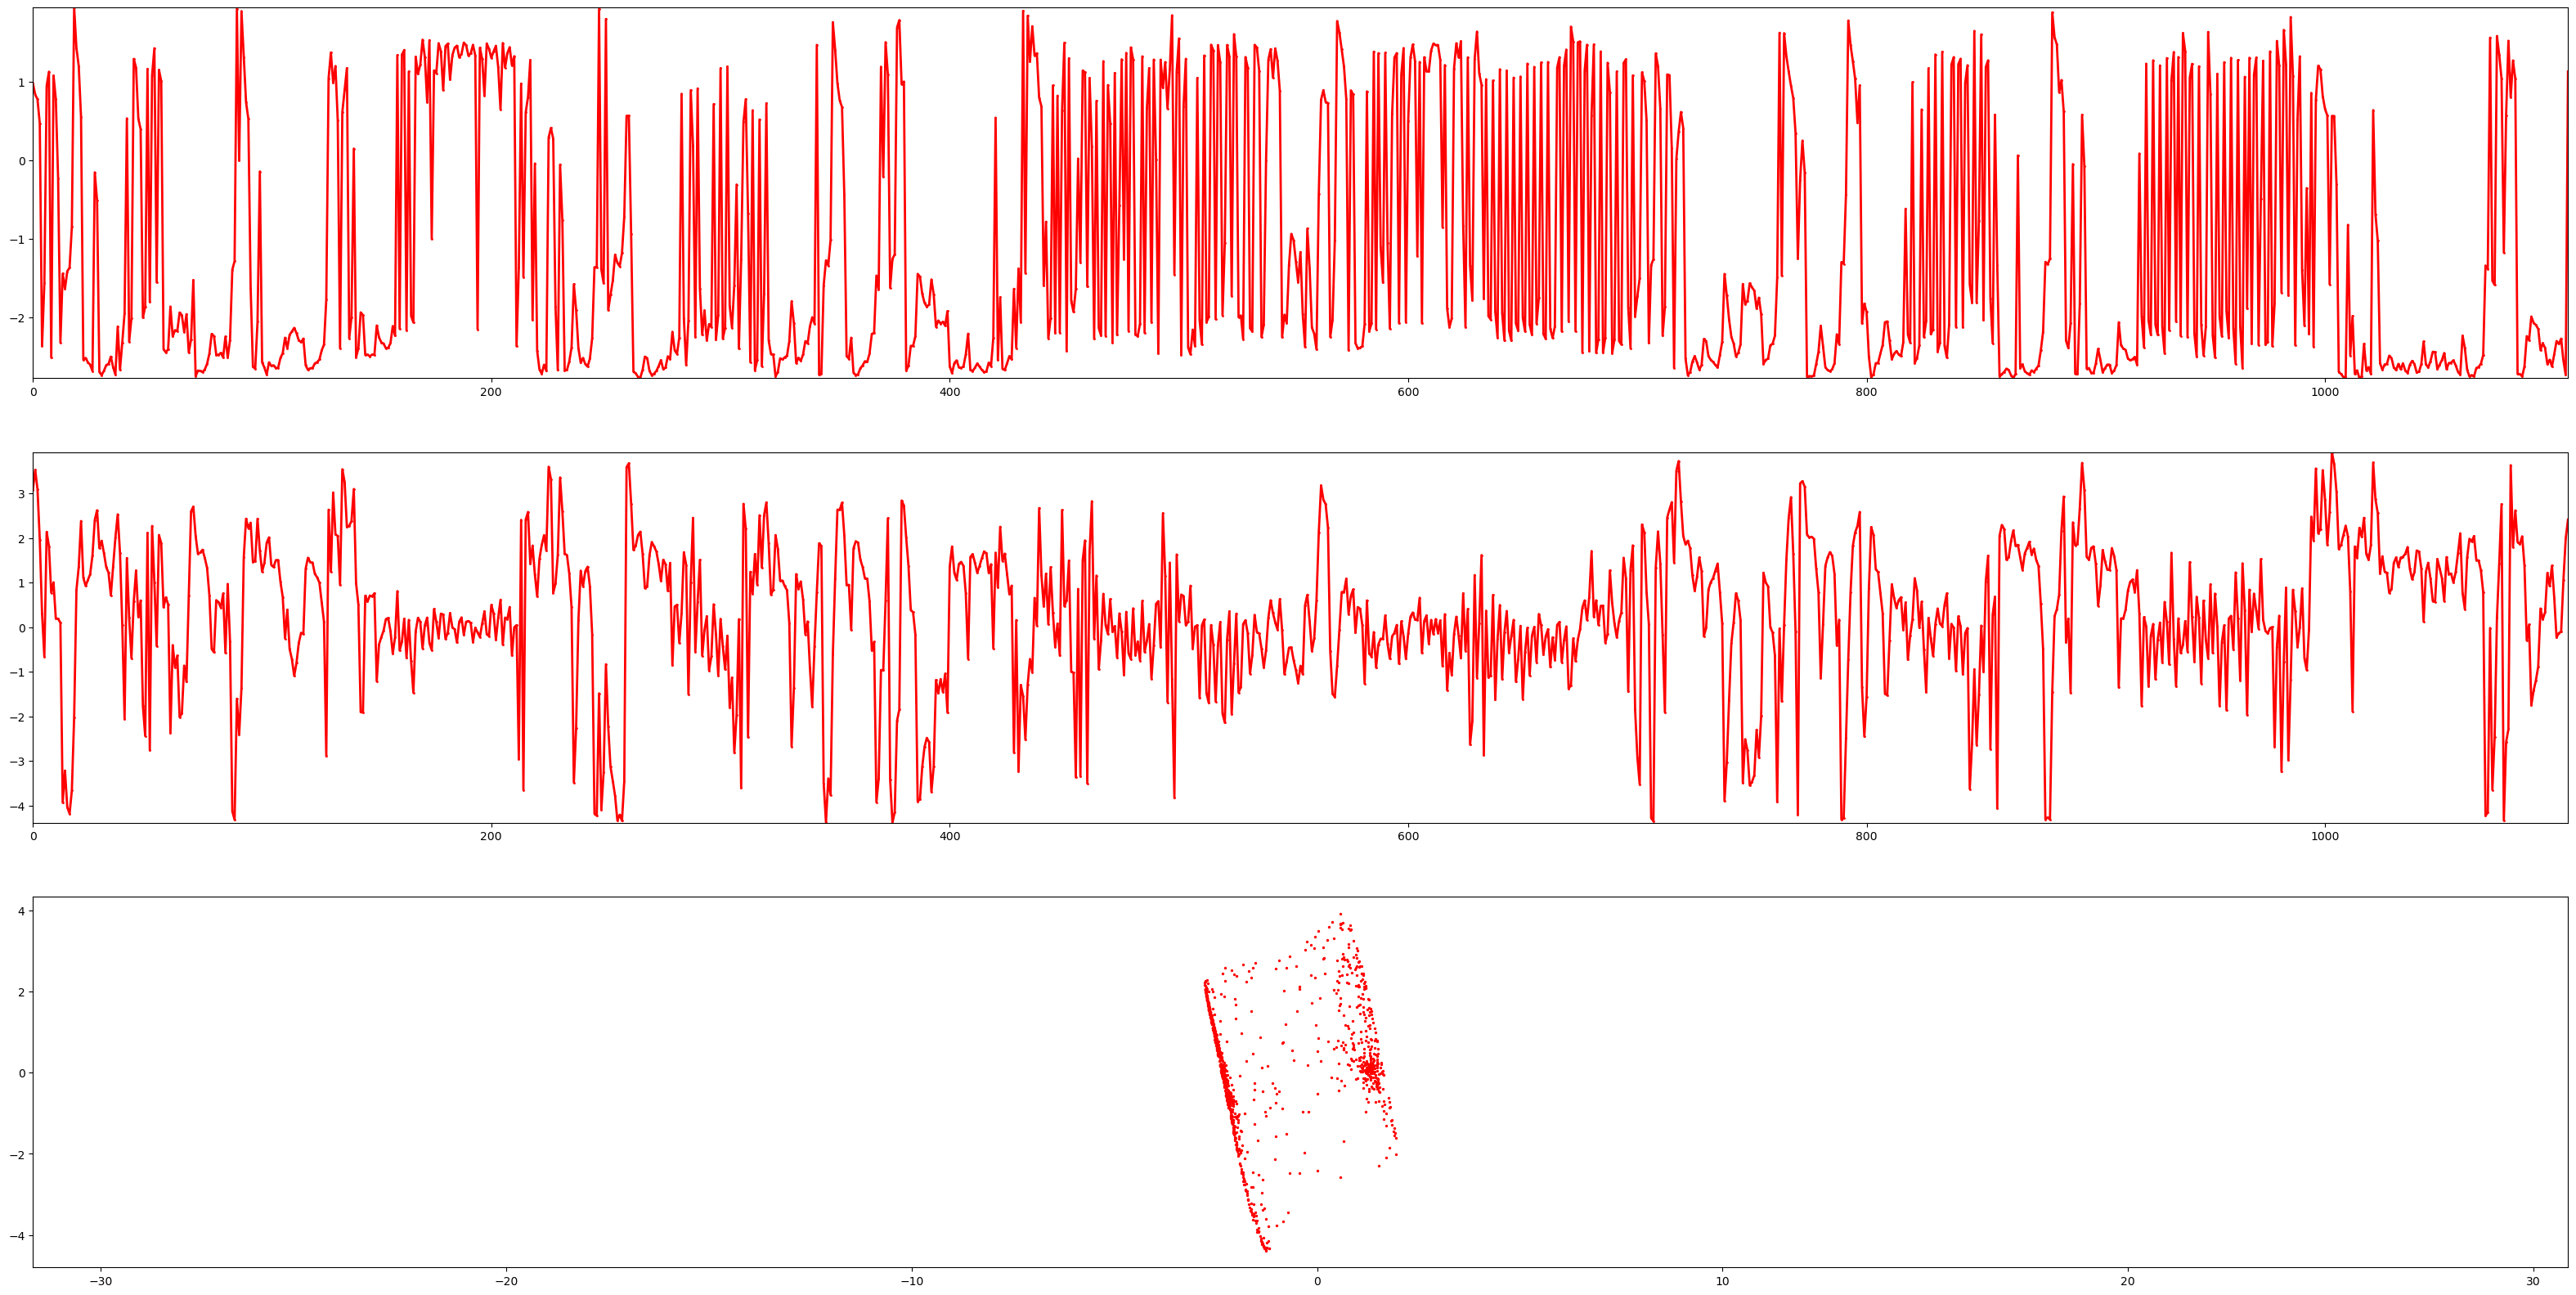

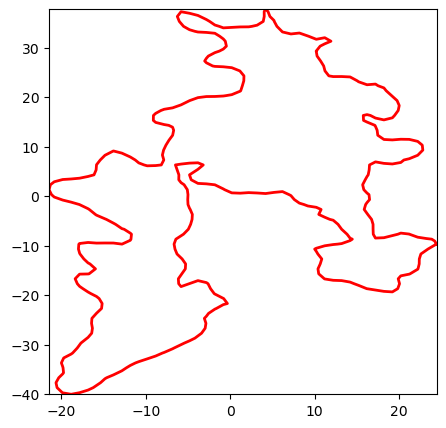

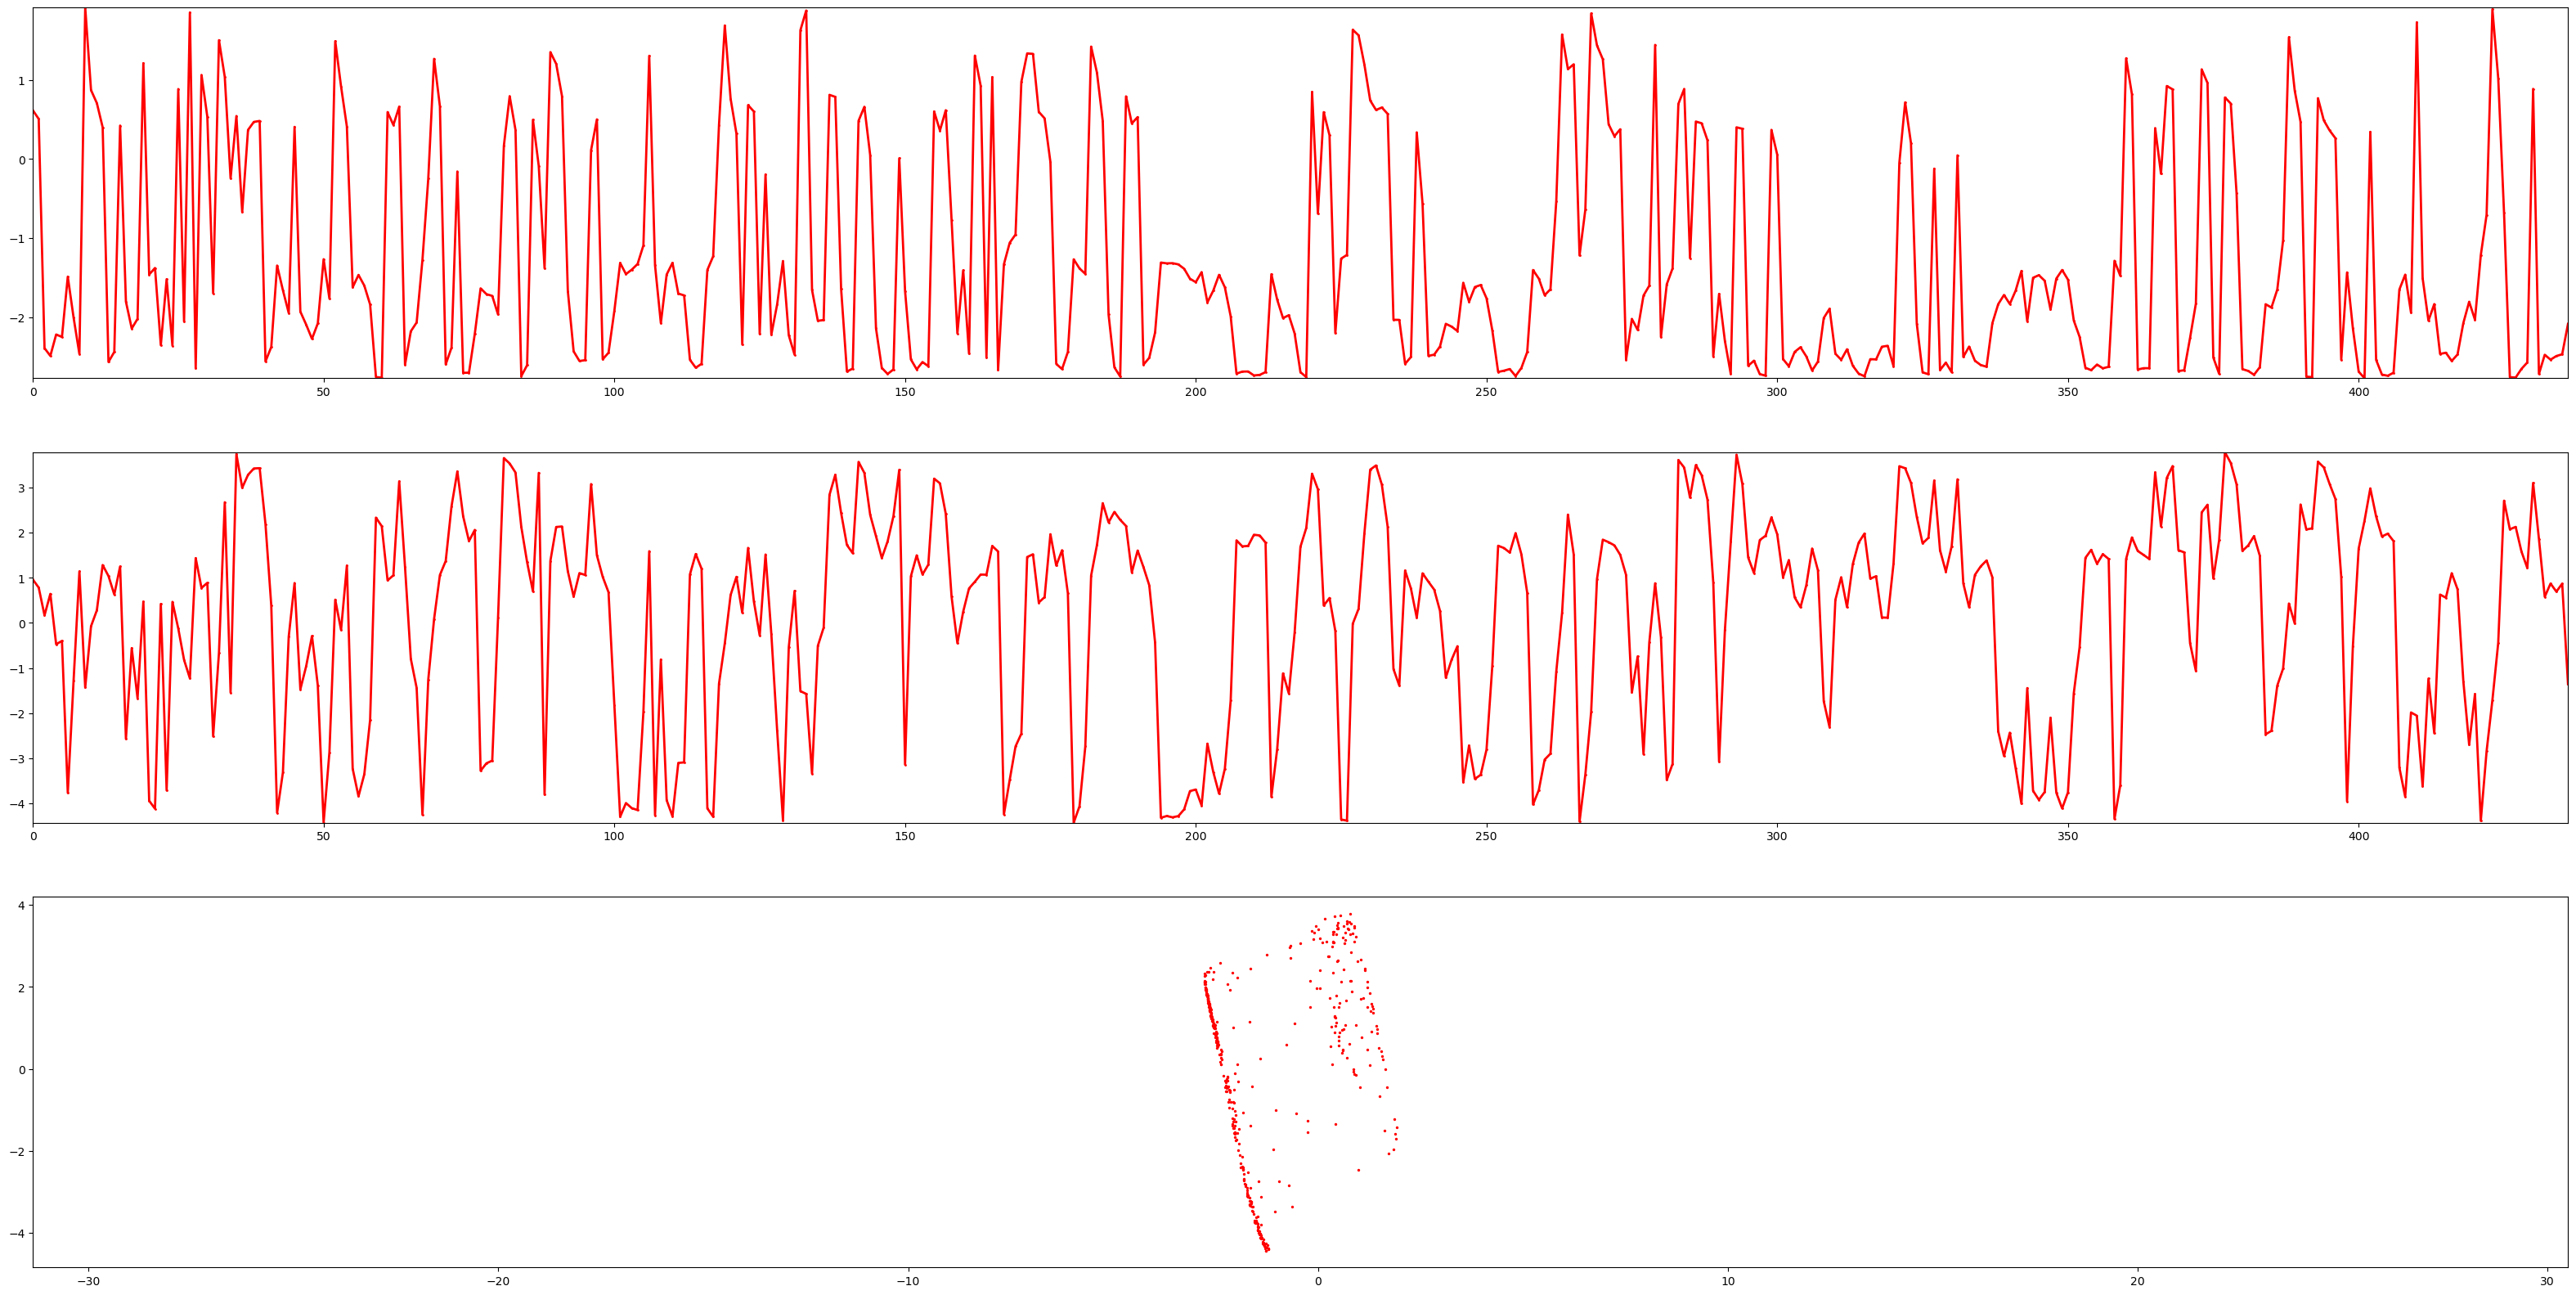

In [5]:
for i in range(0, 10):
    curve = planar_curves_manager.planar_curves[i]
    signature_curve = PlanarCurve(curve.approximate_curve_signature(model=model, supporting_points_count=supporting_points_count, device=device))
    fig1, ax = matplotlib.pyplot.subplots(nrows=1, ncols=1, figsize=(5, 5))
    curve.plot_lined_curve(ax=ax)
    fig2, axes = matplotlib.pyplot.subplots(nrows=3, ncols=1, figsize=(40, 20))
    signature_curve.plot_signature(model=model, supporting_points_count=supporting_points_count, device=device, ax=axes, line_style='-')
    matplotlib.pyplot.show()
    matplotlib.pyplot.close(fig1)
    matplotlib.pyplot.close(fig2)

In [6]:
# comparator = PlanarCurvesApproximatedSignatureComparator(
#     model=model,
#     supporting_points_count=supporting_points_count,
#     device=device)
#
# shape_matching_evaluator = PlanarCurvesShapeMatchingEvaluator(
#     log_dir_path=Path("C:/deep-signature-data-new/notebooks_output"),
#     num_workers=5,
#     curves_count_per_collection=10,
#     curve_collections_file_names=['shapes'],
#     benchmark_dir_path=Path('C:/deep-signature-data-new/curves/benchmark/2023-01-02-00-24-28'),
#     sampling_ratios=[0.8],
#     multimodalities=[5],
#     group_names=['equiaffine'],
#     planar_curves_signature_comparator=comparator)
#
# shape_matching_evaluator.start()
# shape_matching_evaluator.join()
#
# print(shape_matching_evaluator.shape_matching_df)